# Time Series

In [862]:
kings <- scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)

In [863]:
kings[1:10]

[1] 60 43 67 50 56 42 50 65 68 43

In [864]:
kingstimeseries <- ts(kings)

kingstimeseries[1:10]

[1] 60 43 67 50 56 42 50 65 68 43

In [865]:
births <- scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")

In [866]:
births[1:10]

[1] 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227

In [867]:
length(births)

[1] 168

In [868]:
birthtimeseries <- ts(births, frequency=12, start=c(1946, 1))

birthtimeseries[1:10]

[1] 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227

In [869]:
souvenir <- scan("http://robjhyndman.com/tsdldata/data/fancy.dat")

In [870]:
souvenir[1:10]

[1] 1664.81 2397.53 2840.71 3547.29 3752.96 3714.74 4349.61 3566.34 5021.82
[10] 6423.48

In [871]:
souvenirtimeseries <- ts(souvenir, frequency=12, start=c(1978,1))
souvenirtimeseries[1:5]

[1] 1664.81 2397.53 2840.71 3547.29 3752.96

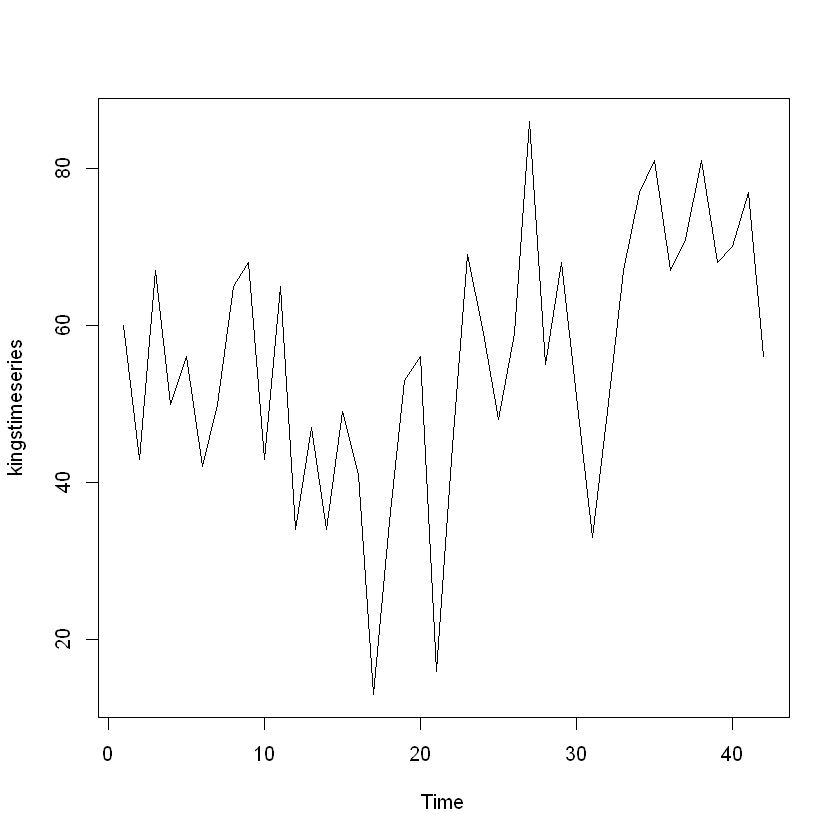

In [872]:
plot.ts(kingstimeseries)

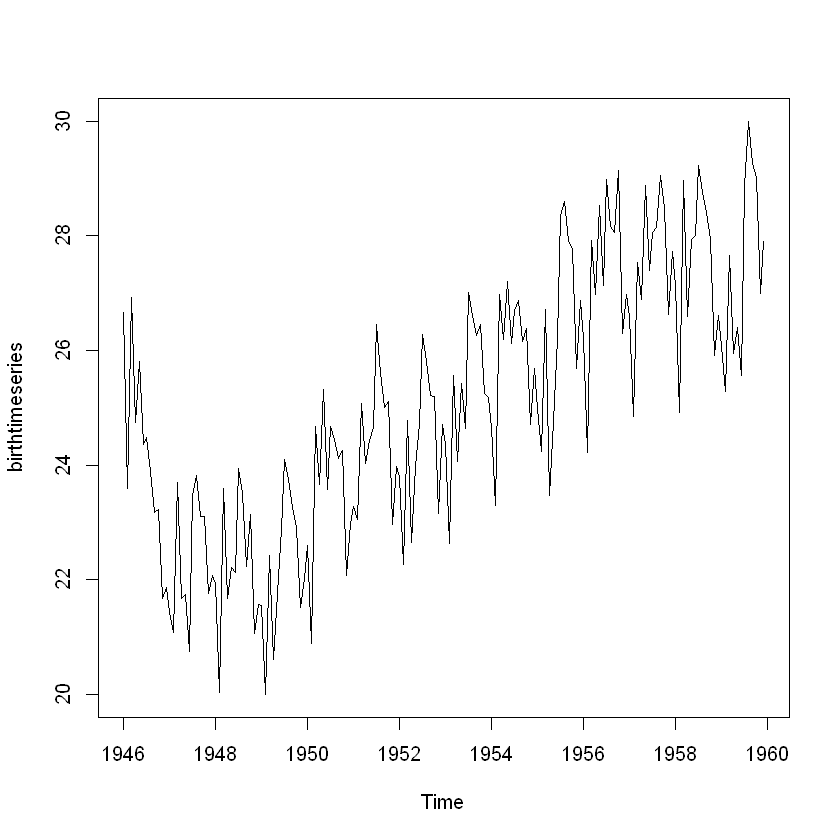

In [873]:
plot.ts(birthtimeseries)

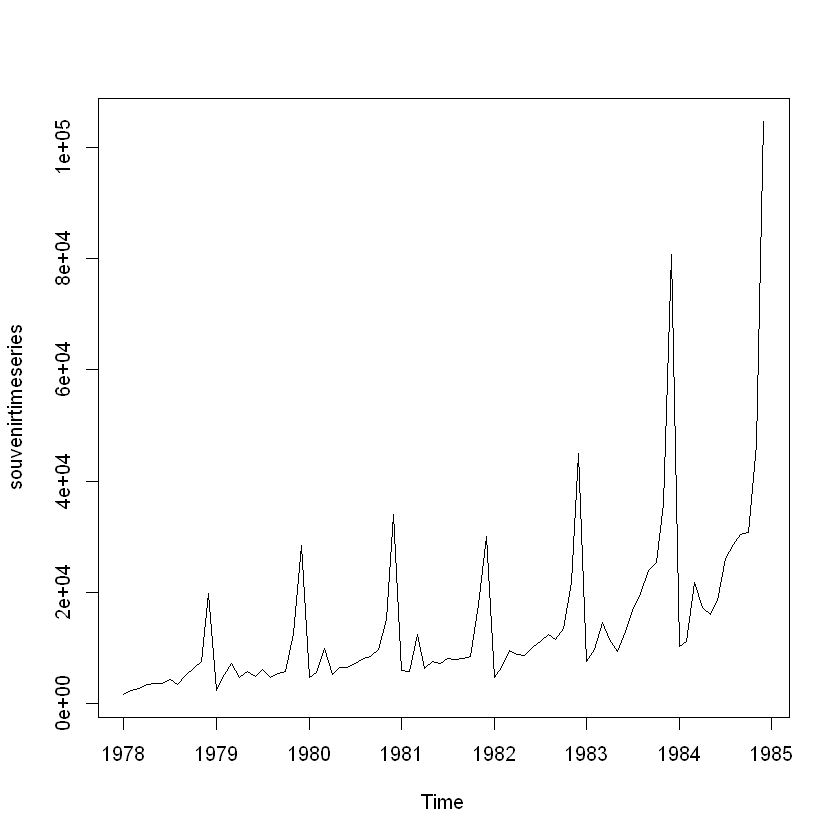

In [874]:
plot.ts(souvenirtimeseries)

Not an additive time series. Let's transform it in order to get a transformed time series that can be described using an additive model.

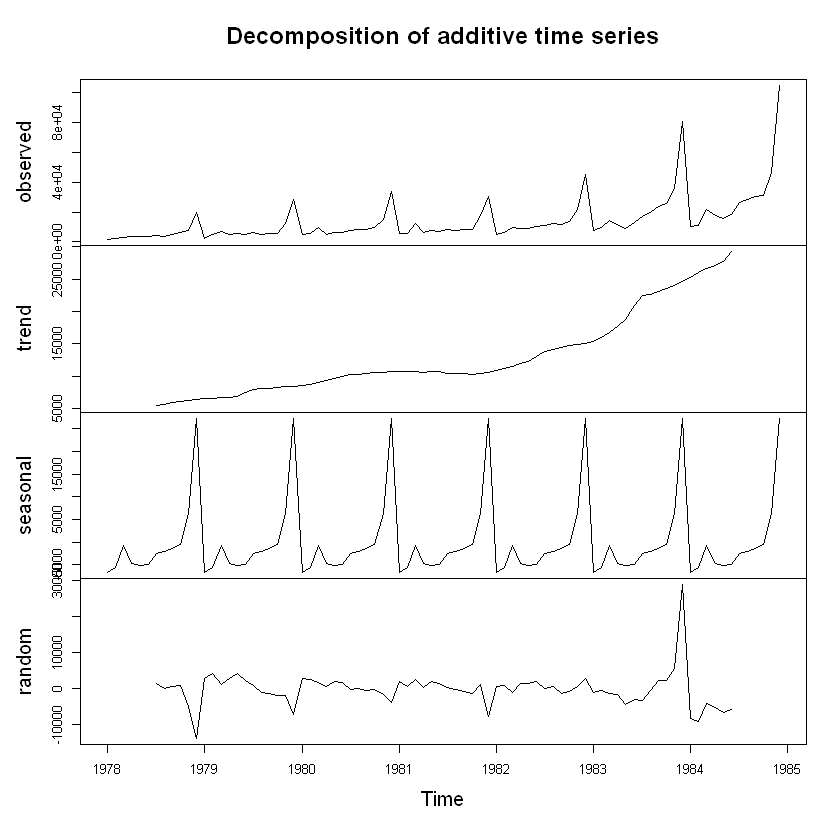

In [875]:
souvenir_decom <- decompose(souvenirtimeseries)

plot(souvenir_decom)

In [876]:
souvenirtimeseries_logged <- log(souvenirtimeseries)
souvenirtimeseries_logged[1:10]

[1] 7.417466 7.782194 7.951809 8.173939 8.230300 8.220064 8.377841 8.179295
 [9] 8.521548 8.767715

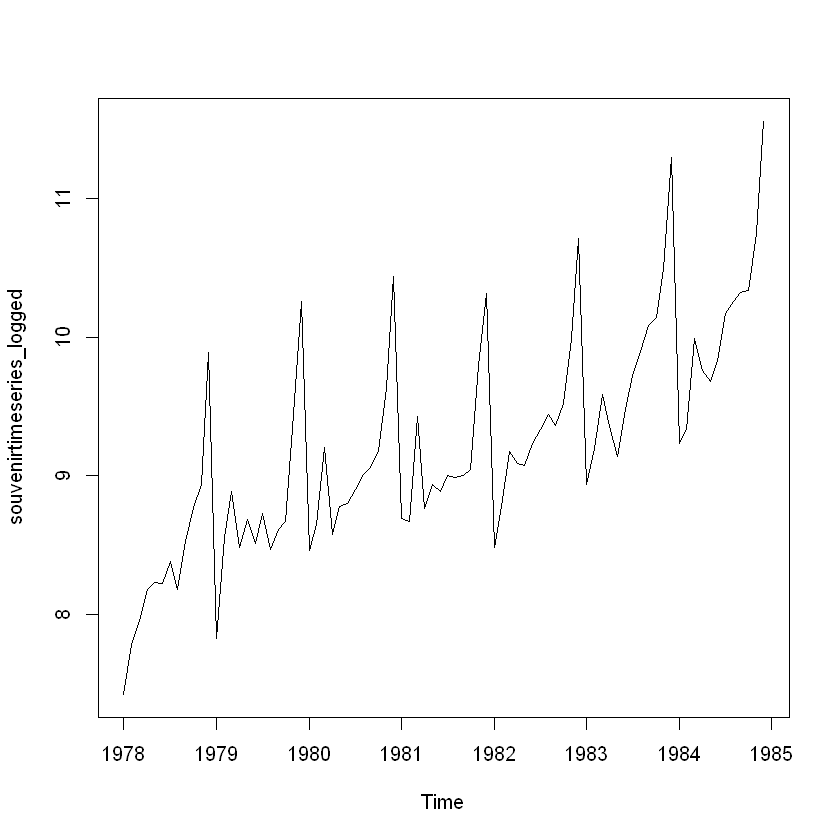

In [877]:
plot.ts(souvenirtimeseries_logged)

Here we can see that the size of the seasonal fluctuations and random fluctuations in the log-transformed time series seem to be roughly constant over time and do not depend on the level of the time series. Thus, the log-transformed time series can probably be described using an additive model

# Decomposing Non-Seasonal Data

In [878]:
library("TTR")

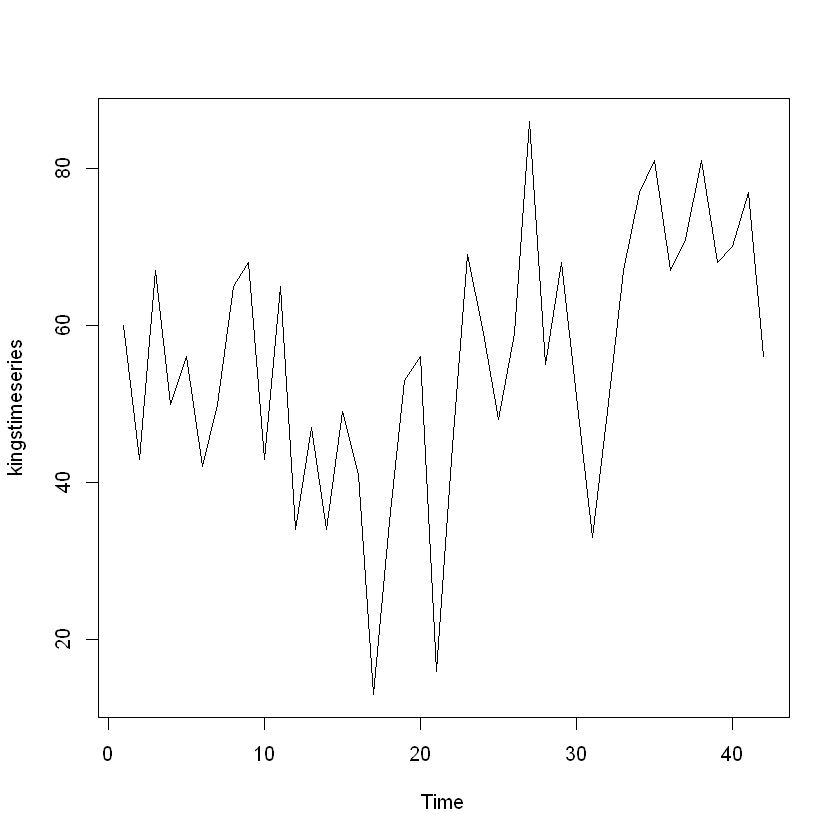

In [879]:
plot.ts(kingstimeseries)

We can try to estimate the trend component of this time series by smoothing using a simple moving average. To smooth the time series using a SMA order of 3...

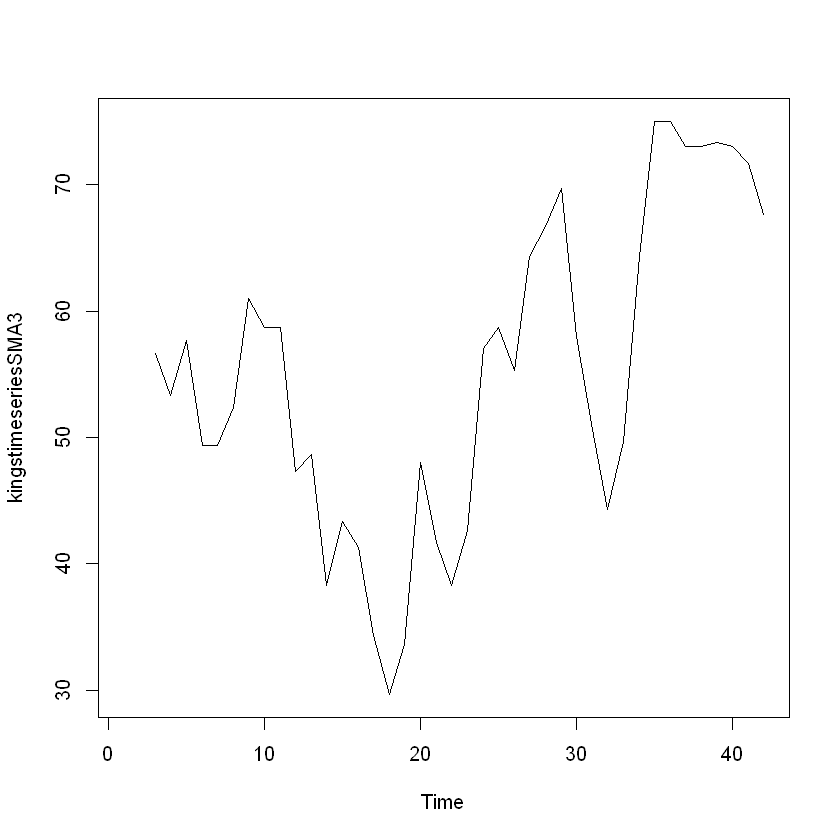

In [880]:
kingstimeseriesSMA3 <- SMA(kingstimeseries, n = 3)
plot.ts(kingstimeseriesSMA3)

There's still quite a bit of random fluctuations in the ts that's smoothed using a simple moving average of order 3. To estimate the trend component more accurately, we might want to try smoothing the data with a simple moving average of a higher order. 

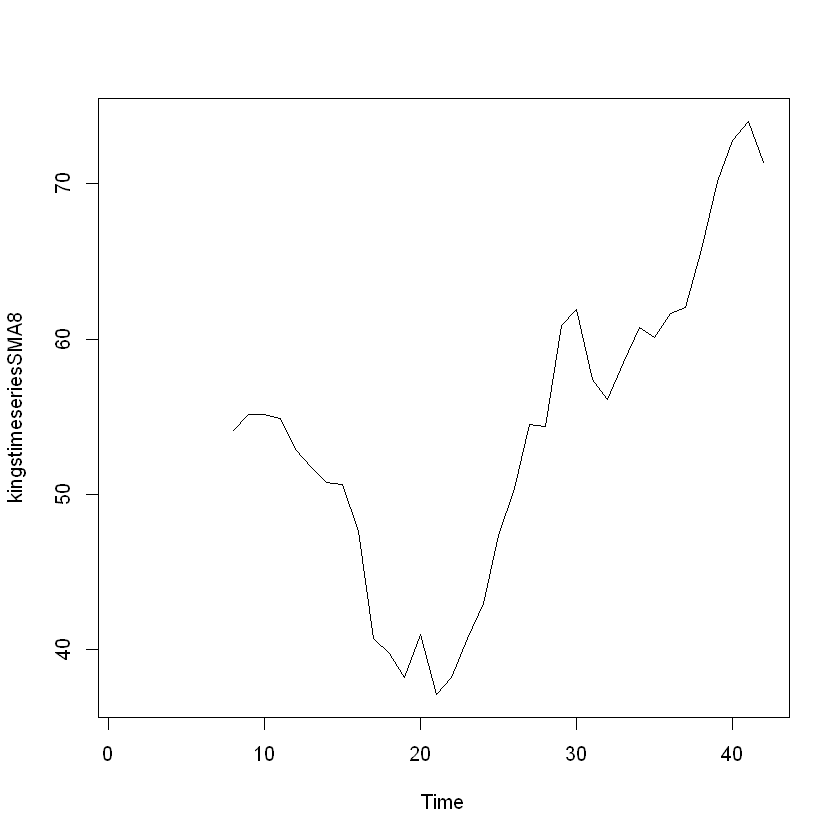

In [881]:
kingstimeseriesSMA8 <- SMA(kingstimeseries,n=8)
plot.ts(kingstimeseriesSMA8)

An order of 8 gives a clearer picture of the trend component and we can see that the age of death of the English kings seems to have decreased from about 55 years old to about 38 years old during the reign of the first 20 kings then icnreased to about 73 years old by the end of the 40th king era. 

# Decomposing Seasonal Data

In [882]:
birthtimeseries

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1946 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
1947 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824 23.105 23.110
1948 21.937 20.035 23.590 21.672 22.222 22.123 23.950 23.504 22.238 23.142
1949 21.548 20.000 22.424 20.615 21.761 22.874 24.104 23.748 23.262 22.907
1950 22.604 20.894 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252
1951 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
1952 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816 25.210 25.199
1953 24.364 22.644 25.565 24.062 25.431 24.635 27.009 26.606 26.268 26.462
1954 24.657 23.304 26.982 26.199 27.210 26.122 26.706 26.878 26.152 26.379
1955 24.990 24.239 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784
1956 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
1957 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141 29.048 28.484
1958 27.132 24.924 28.963

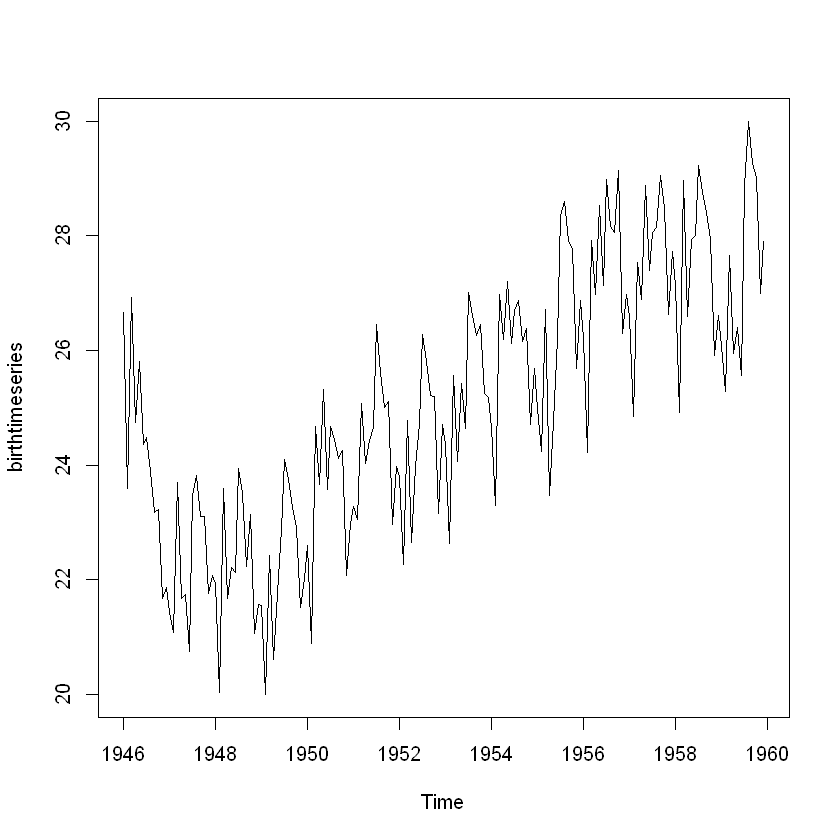

In [883]:
plot.ts(birthtimeseries)

In [884]:
birthstimeseriescomponents <- decompose(birthtimeseries)

The estimated values of the seasonal, trend and irregular components are now stored in variables birthstimeseriescomponents$seasonal, birthstimeseriescomponents$trend and birthstimeseriescomponents$random.

In [885]:
names(birthstimeseriescomponents)

[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"

In [886]:
# get the estimated values of the seasonal component
birthstimeseriescomponents$seasonal[1:10]

[1] -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
 [7]  1.4560457  1.1645938  0.6916162  0.7752444

The estimated seasonal factors are given for the months January-December, and are the same for each year. The largest seasonal factor is for July (about 1.46), and the lowest is for February (about -2.08), indicating that there seems to be a peak in births in July and a trough in births in February each year.

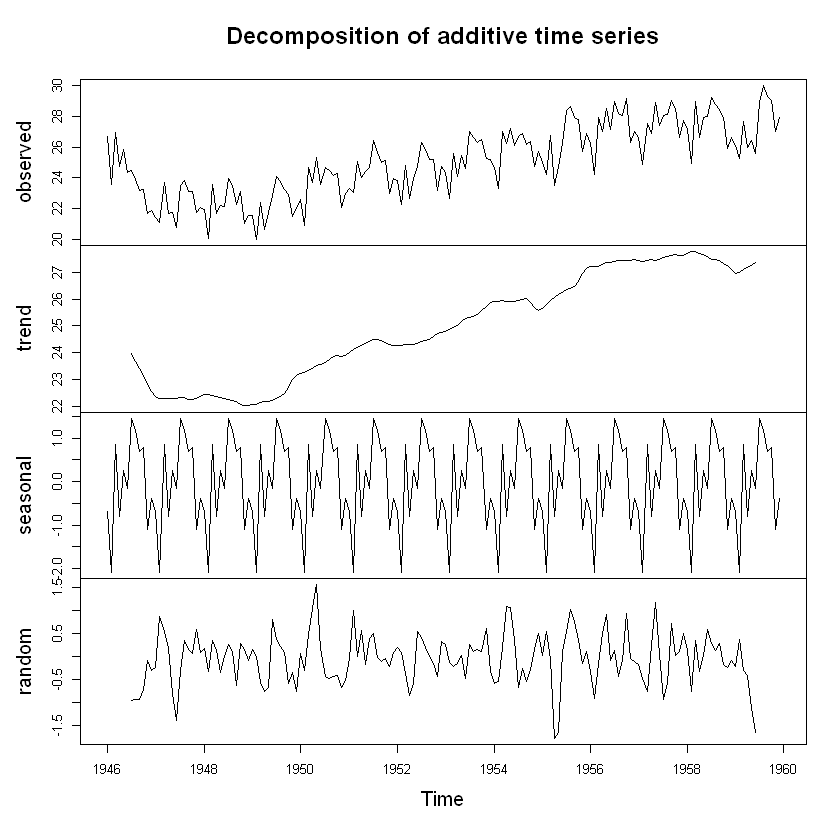

In [887]:
plot(birthstimeseriescomponents)

The plot above shows the original time series (top), the estimated trend component (second from top), the estimated seasonal component (third from top), and the estimated irregular component (bottom). We see that the estimated trend component shows a small decrease from about 24 in 1947 to about 22 in 1948, followed by a steady increase from then on to about 27 in 1959.

## Seasonally Adjusting
If you have a seasonal time series that can be described using an additive model, you can seasonally adjust the time series by estimating the seasonal component, and subtracting the estimated seasonal component from the original time series. We can do this using the estimate of the seasonal component calculated by the “decompose()” function.

For example, to seasonally adjust the time series of the number of births per month in New York city, we can estimate the seasonal component using “decompose()”, and then subtract the seasonal component from the original time series:

In [888]:
birthstimeseriescomponents <- decompose(birthtimeseries)
birthstimeseriesseasonallyadjusted <- birthtimeseries - birthstimeseriescomponents$seasonal

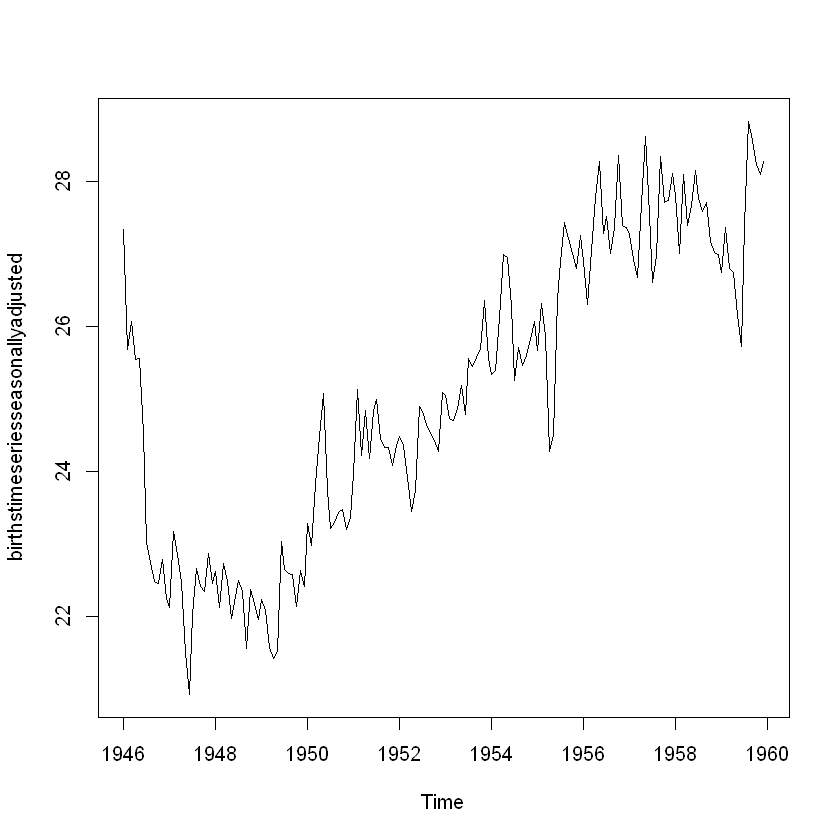

In [889]:
plot(birthstimeseriesseasonallyadjusted)

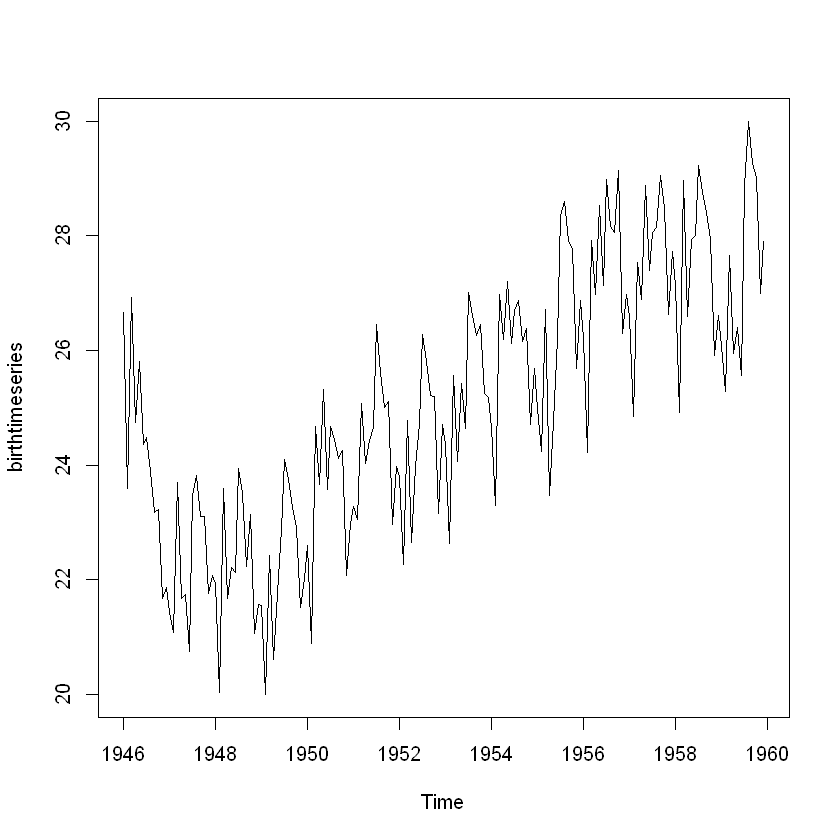

In [890]:
plot(birthtimeseries)

###  Forecasts using Exponential Smoothing
Exponential smoothing can be used to make short-term forecasts for time series data.

#### Simple Exponential Smoothing

If you have a time series that can be described using an additive model with constant level and no seasonality, you can use simple exponential smoothing to make short-term forecasts.

The simple exponential smoothing method provides a way of estimating the level at the current time point. Smoothing is controlled by the parameter alpha; for the estimate of the level at the current time point. The value of alpha; lies between 0 and 1. Values of alpha that are close to 0 mean that little weight is placed on the most recent observations when making forecasts of future values.

In [891]:
rain <- scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)

In [892]:
rainseries <- ts(rain, start=c(1813), frequency=1)

In [893]:
rainseries[1:10]

[1] 23.56 26.07 21.86 31.24 23.65 23.88 26.41 22.67 31.69 23.86

In [894]:
length(rain)

[1] 100

In [895]:
mean(rain)

[1] 24.8239

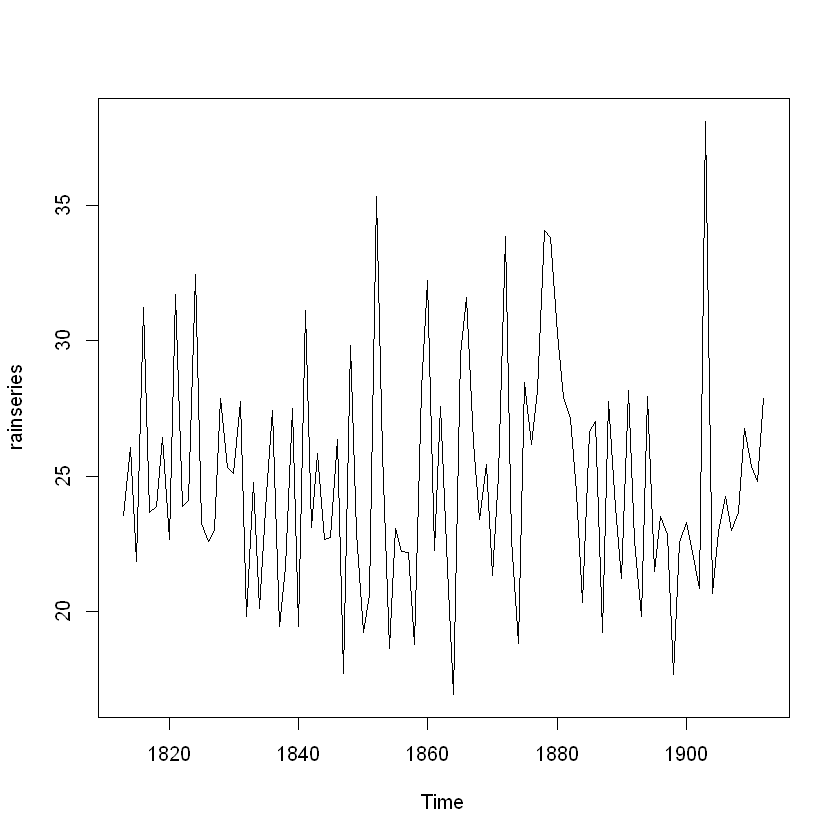

In [896]:
plot.ts(rainseries)

You can see from the plot that there is roughly constant level (the mean stays constant at about 25 inches). The random fluctuations in the time series seem to be roughly constant in size over time, so it is probably appropriate to describe the data using an additive model. Thus, we can make forecasts using simple exponential smoothing.

To make forecasts using simple exponential smoothing in R, we can fit a simple exponential smoothing predictive model using the “HoltWinters()” function in R. To use HoltWinters() for simple exponential smoothing, we need to set the parameters beta=FALSE and gamma=FALSE in the HoltWinters() function (the beta and gamma parameters are used for Holt’s exponential smoothing, or Holt-Winters exponential smoothing, as described below).

In [897]:
rainseriesforecasts <- HoltWinters(rainseries, beta=FALSE, gamma=FALSE)

rainseriesforecasts

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

The output of HoltWinters() tells us that the estimated value of the alpha parameter is about 0.024. This is very close to zero, telling us that the forecasts are based on both recent and less recent observations (although somewhat more weight is placed on recent observations).

By default, HoltWinters() just makes forecasts for the same time period covered by our original time series. In this case, our original time series included rainfall for London from 1813-1912, so the forecasts are also for 1813-1912.

In the example above, we have stored the output of the HoltWinters() function in the list variable “rainseriesforecasts”. The forecasts made by HoltWinters() are stored in a named element of this list variable called “fitted”, so we can get their values by typing:

In [898]:
names(rainseriesforecasts)

[1] "fitted"       "x"            "alpha"        "beta"         "gamma"       
[6] "coefficients" "seasonal"     "SSE"          "call"

In [899]:
rainseriesforecasts$fitted[1:10]

[1] 23.56000 23.62054 23.57808 23.76290 23.76017 23.76306 23.82691 23.79900
 [9] 23.98935 23.98623

We can plot the original time series against the forecasts by typing:

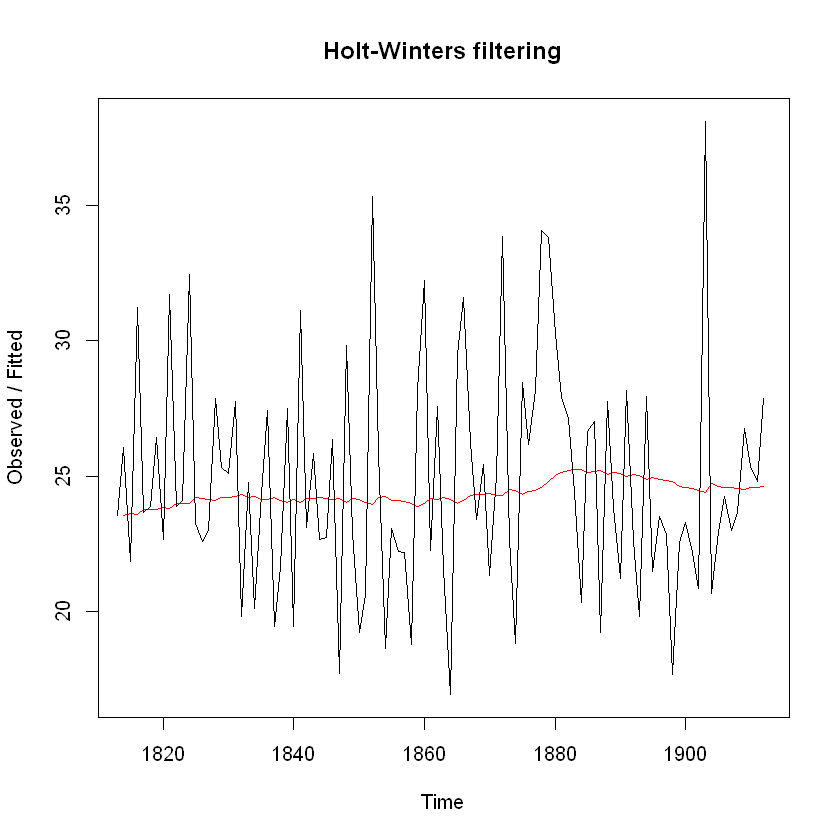

In [900]:
plot(rainseriesforecasts)

The plot shows the original time series in black, and the forecasts as a red line. The time series of forecasts is much smoother than the time series of the original data here.

As a measure of the accuracy of the forecasts, we can calculate the sum of squared errors for the in-sample forecast errors, that is, the forecast errors for the time period covered by our original time series. The sum-of-squared-errors is stored in a named element of the list variable “rainseriesforecasts” called “SSE”, so we can get its value by typing:

In [901]:
rainseriesforecasts$SSE

[1] 1828.855

That is, here the sum-of-squared-errors is 1828.855.

It is common in simple exponential smoothing to use the first value in the time series as the initial value for the level. For example, in the time series for rainfall in London, the first value is 23.56 (inches) for rainfall in 1813. You can specify the initial value for the level in the HoltWinters() function by using the “l.start” parameter. For example, to make forecasts with the initial value of the level set to 23.56, we type:

In [902]:
rain[1:10]

[1] 23.56 26.07 21.86 31.24 23.65 23.88 26.41 22.67 31.69 23.86

In [903]:
HoltWinters(rainseries, beta=FALSE, gamma=FALSE, l.start=23.56)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE, l.start = 23.56)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

As explained above, by default HoltWinters() just makes forecasts for the time period covered by the original data, which is 1813-1912 for the rainfall time series. We can make forecasts for further time points by using the “forecast.HoltWinters()” function in the R “forecast” package. 

In [904]:
library("forecast")

When using the forecast.HoltWinters() function, as its first argument (input), you pass it the predictive model that you have already fitted using the HoltWinters() function. For example, in the case of the rainfall time series, we stored the predictive model made using HoltWinters() in the variable “rainseriesforecasts”. You specify how many further time points you want to make forecasts for by using the “h” parameter in forecast.HoltWinters(). For example, to make a forecast of rainfall for the years 1814-1820 (8 more years) using forecast.HoltWinters(), we type:

In [905]:
rainseriesforecasts2 <- forecast:::forecast.HoltWinters(rainseriesforecasts, h=8)
rainseriesforecasts2

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1913       24.67819 19.17493 30.18145 16.26169 33.09470
1914       24.67819 19.17333 30.18305 16.25924 33.09715
1915       24.67819 19.17173 30.18465 16.25679 33.09960
1916       24.67819 19.17013 30.18625 16.25434 33.10204
1917       24.67819 19.16853 30.18785 16.25190 33.10449
1918       24.67819 19.16694 30.18945 16.24945 33.10694
1919       24.67819 19.16534 30.19105 16.24701 33.10938
1920       24.67819 19.16374 30.19265 16.24456 33.11182

The forecast.HoltWinters() function gives you the forecast for a year, a 80% prediction interval for the forecast, and a 95% prediction interval for the forecast. For example, the forecasted rainfall for 1920 is about 24.68 inches, with a 95% prediction interval of (16.24, 33.11).

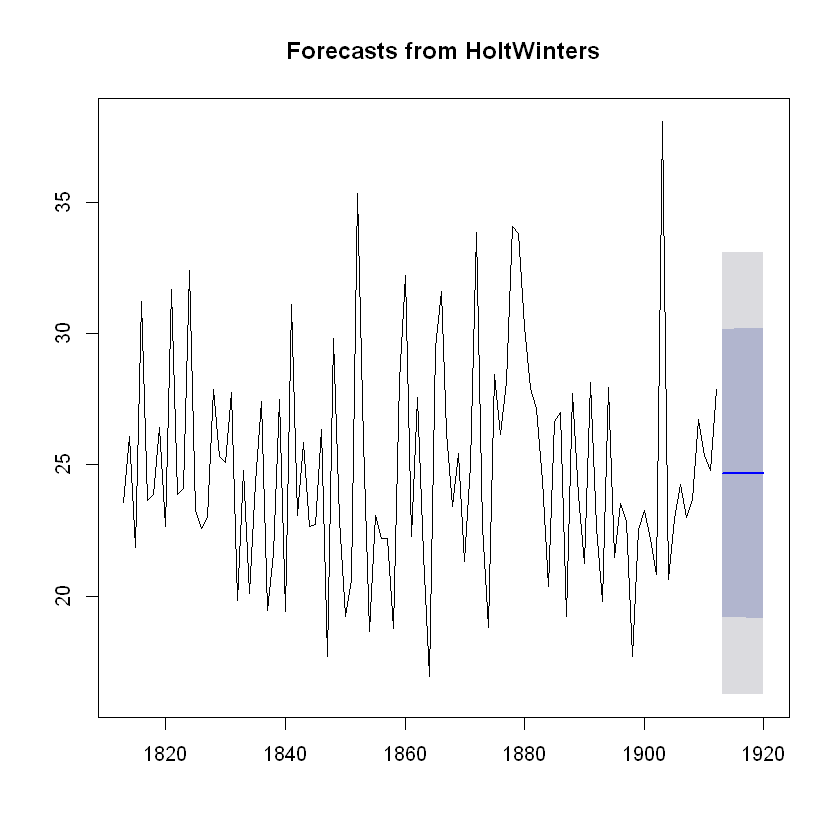

In [906]:
forecast:::plot.forecast(rainseriesforecasts2)

Here the forecasts for 1913-1920 are plotted as a blue line, the 80% prediction interval as an purple shaded area, and the 95% prediction interval as a gray shaded area.

The ‘forecast errors’ are calculated as the observed values minus predicted values, for each time point. We can only calculate the forecast errors for the time period covered by our original time series, which is 1813-1912 for the rainfall data. As mentioned above, one measure of the accuracy of the predictive model is the sum-of-squared-errors (SSE) for the in-sample forecast errors.

The in-sample forecast errors are stored in the named element “residuals” of the list variable returned by forecast.HoltWinters(). If the predictive model cannot be improved upon, there should be no correlations between forecast errors for successive predictions. In other words, if there are correlations between forecast errors for successive predictions, it is likely that the simple exponential smoothing forecasts could be improved upon by another forecasting technique.

To figure out whether this is the case, we can obtain a correlogram of the in-sample forecast errors for lags 1-20. We can calculate a correlogram of the forecast errors using the “acf()” function in R. To specify the maximum lag that we want to look at, we use the “lag.max” parameter in acf().

For example, to calculate a correlogram of the in-sample forecast errors for the London rainfall data for lags 1-20, we type:

In [907]:
head(rainseriesforecasts2$residuals)

Time Series:
Start = 1813 
End = 1818 
Frequency = 1 
[1]         NA  2.5100000 -1.7605450  7.6619220 -0.1128951  0.1198281

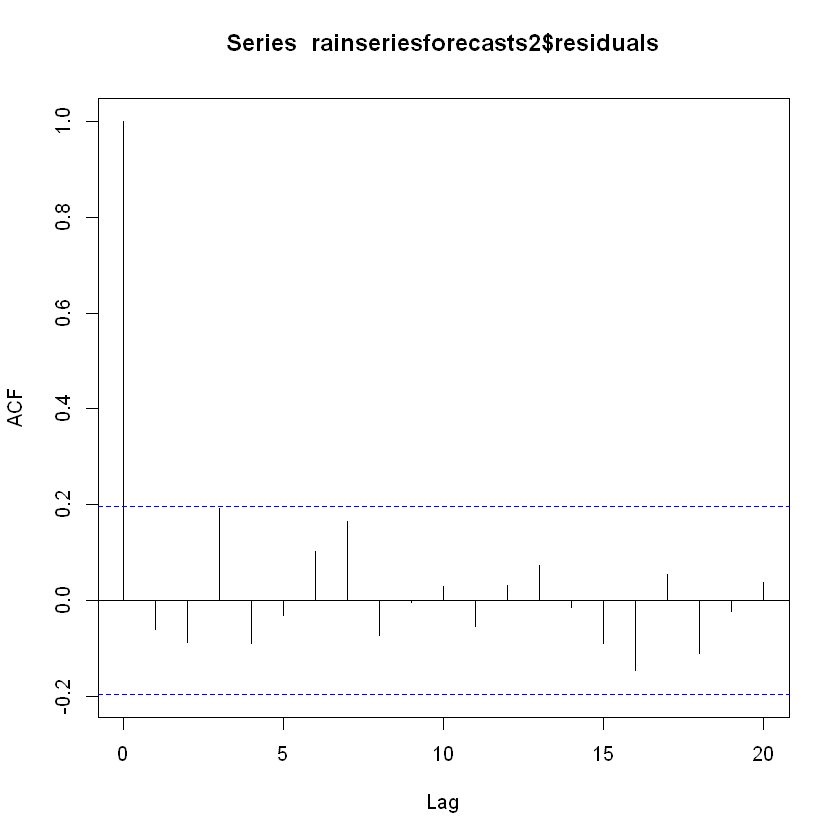

In [908]:
acf(rainseriesforecasts2$residuals, lag.max=20, na.action = na.pass)

You can see from the sample correlogram that the autocorrelation at lag 3 is just touching the significance bounds. To test whether there is significant evidence for non-zero correlations at lags 1-20, we can carry out a Ljung-Box test. This can be done in R using the “Box.test()”, function. The maximum lag that we want to look at is specified using the “lag” parameter in the Box.test() function. For example, to test whether there are non-zero autocorrelations at lags 1-20, for the in-sample forecast errors for London rainfall data, we type:

In [909]:
Box.test(rainseriesforecasts2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  rainseriesforecasts2$residuals
X-squared = 17.401, df = 20, p-value = 0.6268


P-value is higher than 0.05 so we fail to reject the null hypothesis that there is no non-zero autocorrelation. In other words, there is little evidence of non-zero autocorrelations in the sample forecast errors at lags 1 to 20 

To be sure that the predictive model cannot be improved upon, it is also a good idea to check whether the forecast errors are normally distributed with mean zero and constant variance. To check whether the forecast errors have constant variance, we can make a time plot of the in-sample forecast errors:

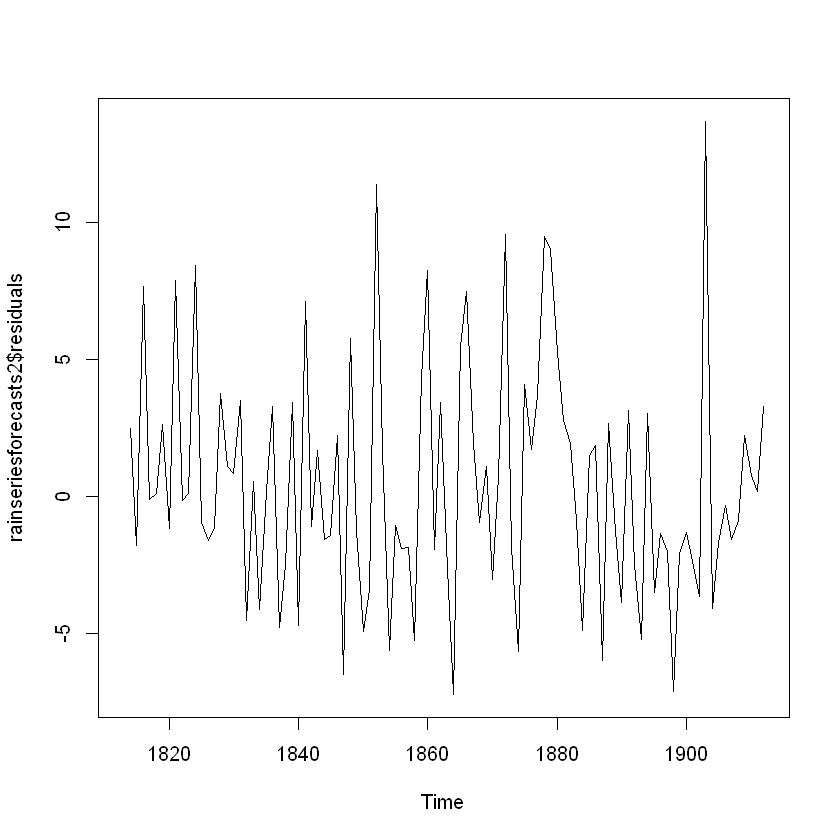

In [910]:
plot.ts(rainseriesforecasts2$residuals)

The plot shows that the in-sample forecast errors seem to have roughly constant variance over time, although the size of the fluctuations in the start of the time series (1820-1830) may be slightly less than that at later dates (eg. 1840-1850).

To check whether the forecast errors are normally distributed with mean zero, we can plot a histogram of the forecast errors, with an overlaid normal curve that has mean zero and the same standard deviation as the distribution of forecast errors. To do this, we can define an R function “plotForecastErrors()”, below:

In [911]:
rainseriesforecasts2$residuals[1:10]

[1]         NA  2.5100000 -1.7605450  7.6619220 -0.1128951  0.1198281
 [7]  2.6469377 -1.1569105  7.8909960 -0.1293468

In [912]:
residuals <-  as.factor(rainseriesforecasts2$residuals)
residuals <- as.numeric(as.character(residuals[!is.na(residuals)]))
residuals[1:10]

[1]  2.5100000 -1.7605450  7.6619220 -0.1128951  0.1198281  2.6469377
 [7] -1.1569105  7.8909960 -0.1293468  0.1237733

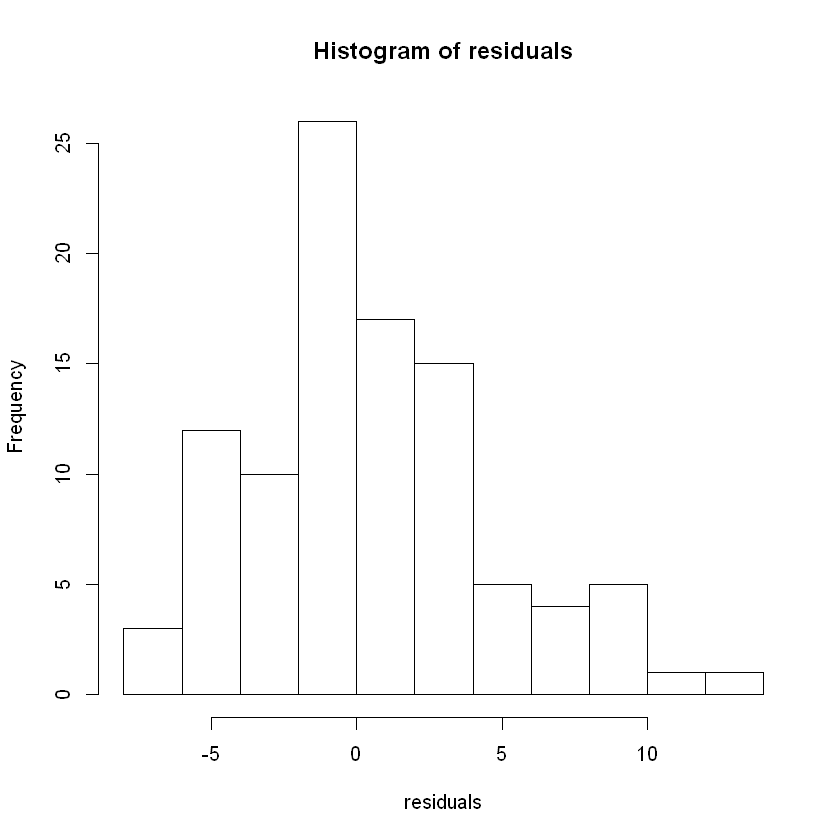

In [913]:
hist(residuals)

In [914]:
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.96468, p-value = 0.009271


In [915]:
mean(residuals)

[1] 0.4682496

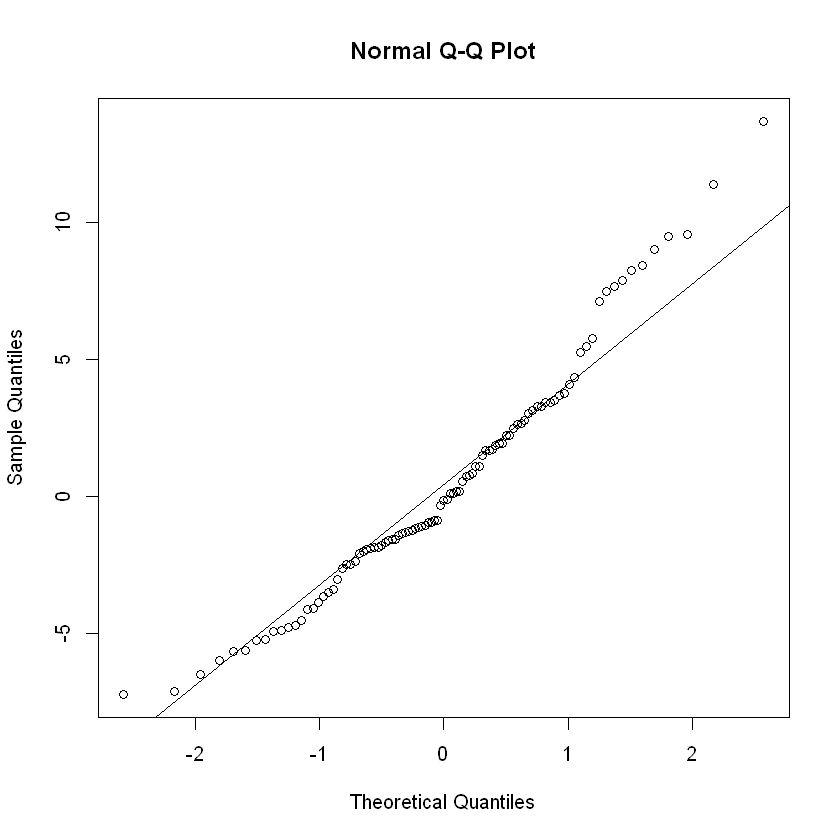

In [916]:
qqnorm(residuals); qqline(residuals)

The plot shows that the distribution of forecast errors is roughly centred on zero, and is more or less normally distributed, although it seems to be slightly skewed to the right compared to a normal curve. However, the right skew is relatively small, and so it is plausible that the forecast errors are normally distributed with mean zero.

The Ljung-Box test showed that there is little evidence of non-zero autocorrelations in the in-sample forecast errors, and the distribution of forecast errors seems to be normally distributed with mean zero. This suggests that the simple exponential smoothing method provides an adequate predictive model for London rainfall, which probably cannot be improved upon. Furthermore, the assumptions that the 80% and 95% predictions intervals were based upon (that there are no autocorrelations in the forecast errors, and the forecast errors are normally distributed with mean zero and constant variance) are probably valid.

## Holt’s Exponential Smoothing
If you have a time series that can be described using an additive model with increasing or decreasing trend and no seasonality, you can use Holt’s exponential smoothing to make short-term forecasts.

Holt’s exponential smoothing estimates the level and slope at the current time point. Smoothing is controlled by two parameters, alpha, for the estimate of the level at the current time point, and beta for the estimate of the slope b of the trend component at the current time point. As with simple exponential smoothing, the paramters alpha and beta have values between 0 and 1, and values that are close to 0 mean that little weight is placed on the most recent observations when making forecasts of future values.

An example of a time series that can probably be described using an additive model with a trend and no seasonality is the time series of the annual diameter of women’s skirts at the hem, from 1866 to 1911. The data is available in the file http://robjhyndman.com/tsdldata/roberts/skirts.dat (original data from Hipel and McLeod, 1994).

In [917]:
skirts <- scan("http://robjhyndman.com/tsdldata/roberts/skirts.dat",skip=5)

In [918]:
skirts[1:10]

[1] 608 617 625 636 657 691 728 784 816 876

In [919]:
length(skirts)

[1] 46

In [920]:
skirtsseries <- ts(skirts,start=c(1866))

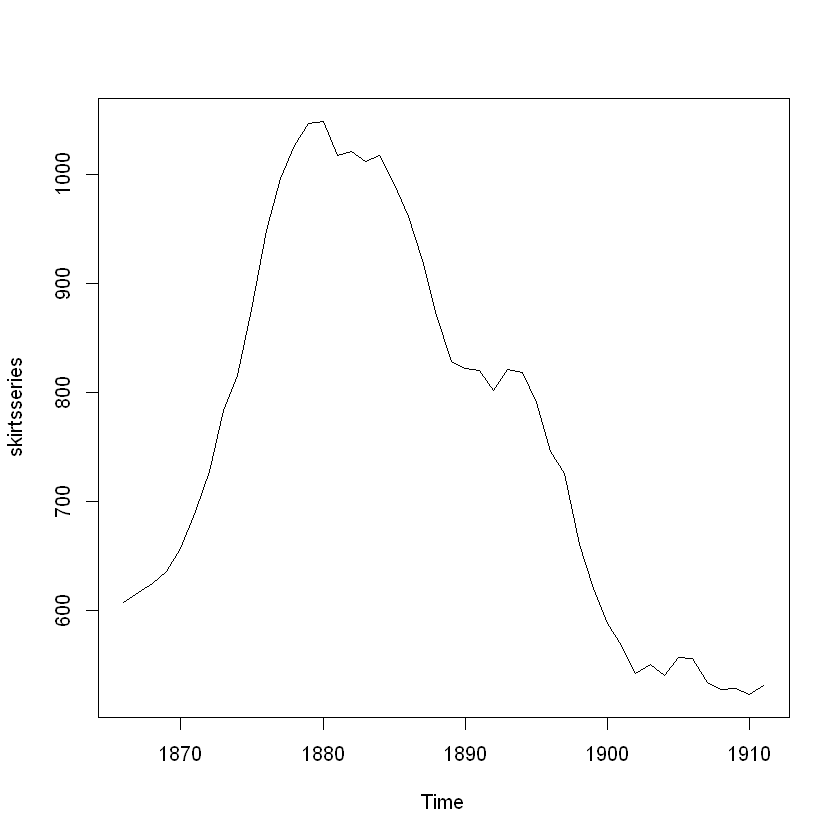

In [921]:
plot.ts(skirtsseries)

We can see from the plot that there was an increase in hem diameter from about 600 in 1866 to about 1050 in 1880, and that afterwards the hem diameter decreased to about 520 in 1911.

To make forecasts, we can fit a predictive model using the HoltWinters() function in R. To use HoltWinters() for Holt’s exponential smoothing, we need to set the parameter gamma=FALSE (the gamma parameter is used for Holt-Winters exponential smoothing, as described below).

For example, to use Holt’s exponential smoothing to fit a predictive model for skirt hem diameter, we type:

In [922]:
skirtsseriesforecasts <- HoltWinters(skirtsseries, gamma=FALSE)

skirtsseriesforecasts

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = skirtsseries, gamma = FALSE)

Smoothing parameters:
 alpha: 0.8383481
 beta : 1
 gamma: FALSE

Coefficients:
        [,1]
a 529.308585
b   5.690464

In [923]:
skirtsseriesforecasts$SSE

[1] 16954.18

The estimated value of alpha is 0.84, and of beta is 1.00. These are both high, telling us that both the estimate of the current value of the level, and of the slope b of the trend component, are based mostly upon very recent observations in the time series. This makes good intuitive sense, since the level and the slope of the time series both change quite a lot over time. The value of the sum-of-squared-errors for the in-sample forecast errors is 16954.

We can plot the original time series as a black line, with the forecasted values as a red line on top of that, by typing:

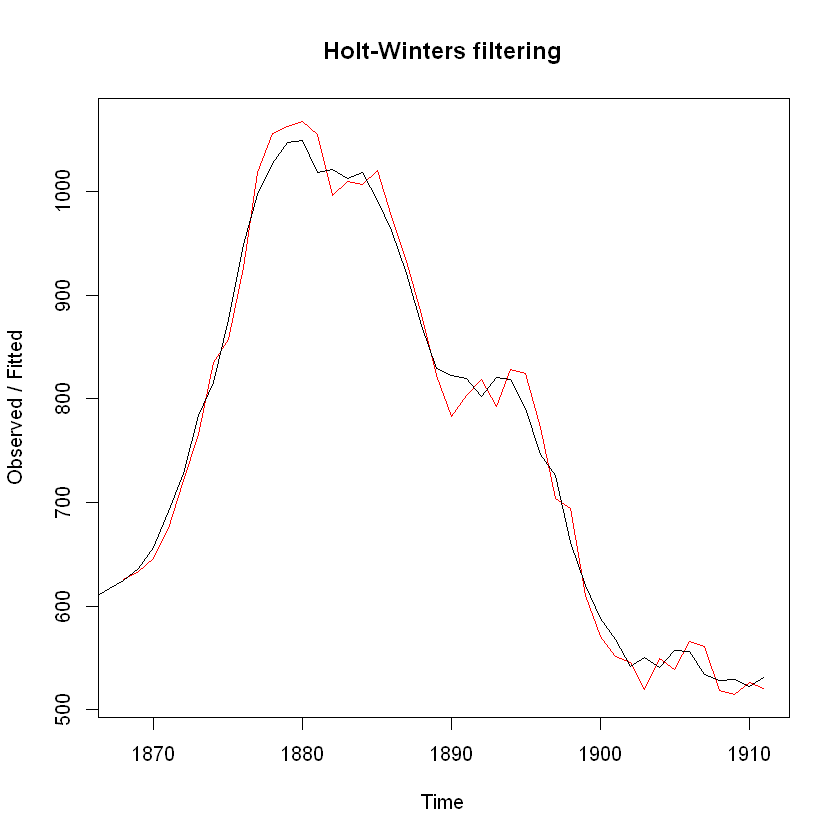

In [924]:
plot(skirtsseriesforecasts)

We can see from the picture that the in-sample forecasts agree pretty well with the observed values, although they tend to lag behind the observed values a little bit.

If you wish, you can specify the initial values of the level and the slope b of the trend component by using the “l.start” and “b.start” arguments for the HoltWinters() function. It is common to set the initial value of the level to the first value in the time series (608 for the skirts data), and the initial value of the slope to the second value minus the first value (9 for the skirts data). For example, to fit a predictive model to the skirt hem data using Holt’s exponential smoothing, with initial values of 608 for the level and 9 for the slope b of the trend component, we type:

In [925]:
HoltWinters(skirtsseries, gamma=FALSE, l.start=608, b.start=9)

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = skirtsseries, gamma = FALSE, l.start = 608, b.start = 9)

Smoothing parameters:
 alpha: 0.8346775
 beta : 1
 gamma: FALSE

Coefficients:
        [,1]
a 529.278637
b   5.670129

As for simple exponential smoothing, we can make forecasts for future times not covered by the original time series by using the forecast.HoltWinters() function in the “forecast” package. For example, our time series data for skirt hems was for 1866 to 1911, so we can make predictions for 1912 to 1930 (19 more data points), and plot them, by typing:

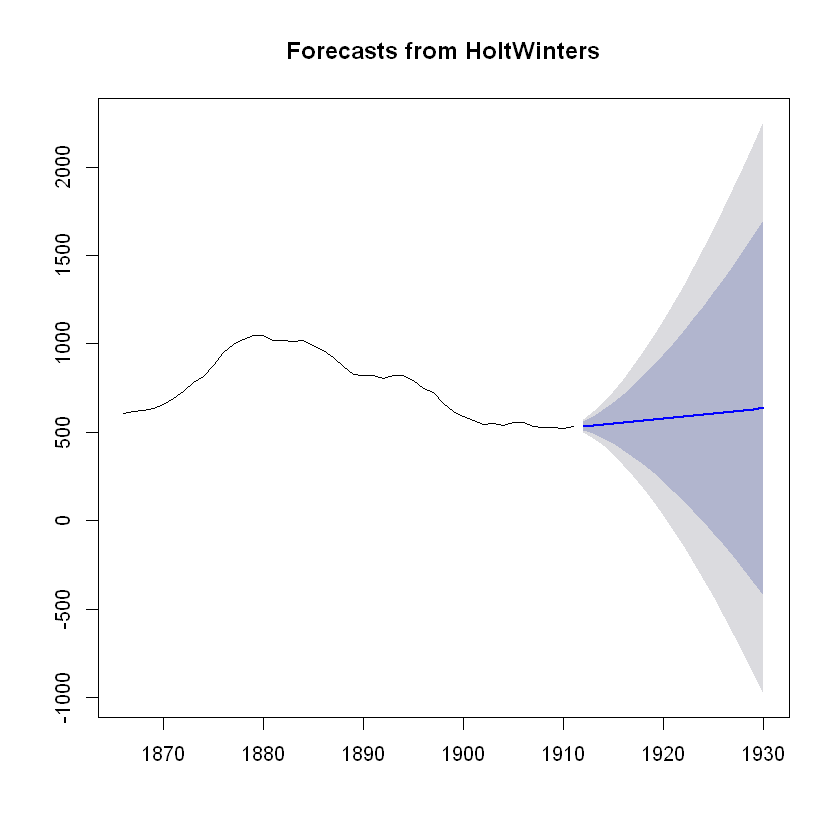

In [926]:
skirtsseriesforecasts2 <- forecast:::forecast.HoltWinters(skirtsseriesforecasts, h=19)

forecast:::plot.forecast(skirtsseriesforecasts2)

The forecasts are shown as a blue line, with the 80% prediction intervals as an purple shaded area, and the 95% prediction intervals as a gray shaded area.

As for simple exponential smoothing, we can check whether the predictive model could be improved upon by checking whether the in-sample forecast errors show non-zero autocorrelations at lags 1-20. For example, for the skirt hem data, we can make a correlogram, and carry out the Ljung-Box test, by typing:

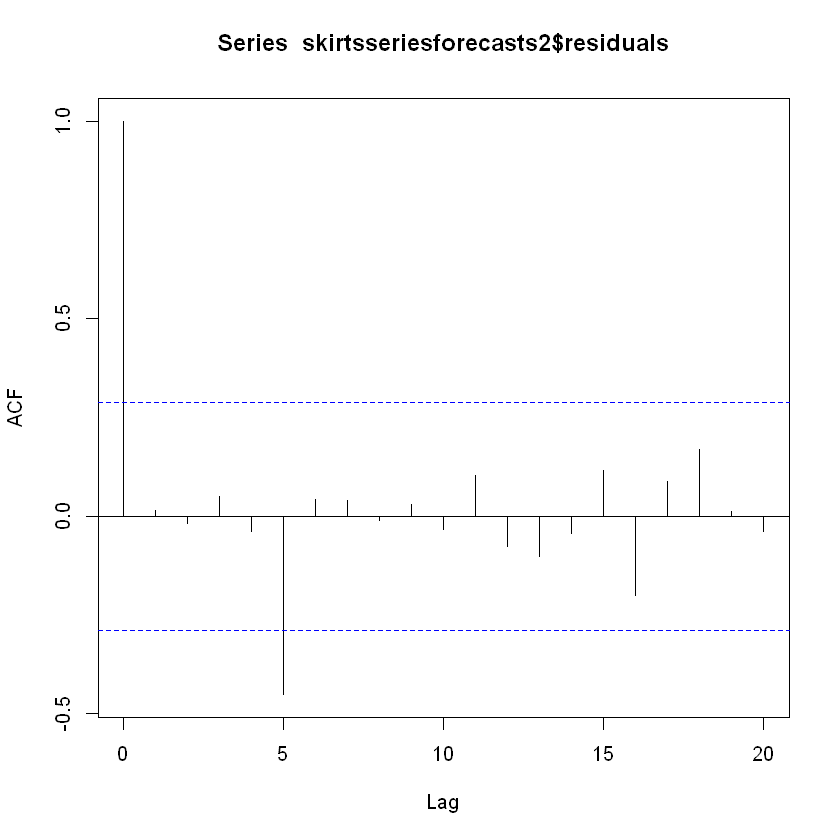

In [927]:
acf(skirtsseriesforecasts2$residuals, lag.max=20, na.action = na.pass)

In [928]:
Box.test(skirtsseriesforecasts2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  skirtsseriesforecasts2$residuals
X-squared = 19.731, df = 20, p-value = 0.4749


Here the correlogram shows that the sample autocorrelation for the in-sample forecast errors at lag 5 exceeds the significance bounds. However, we would expect one in 20 of the autocorrelations for the first twenty lags to exceed the 95% significance bounds by chance alone. Indeed, when we carry out the Ljung-Box test, the p-value is 0.47, indicating that there is little evidence of non-zero autocorrelations in the in-sample forecast errors at lags 1-20.

As for simple exponential smoothing, we should also check that the forecast errors have constant variance over time, and are normally distributed with mean zero. We can do this by making a time plot of forecast errors, and a histogram of the distribution of forecast errors with an overlaid normal curve:

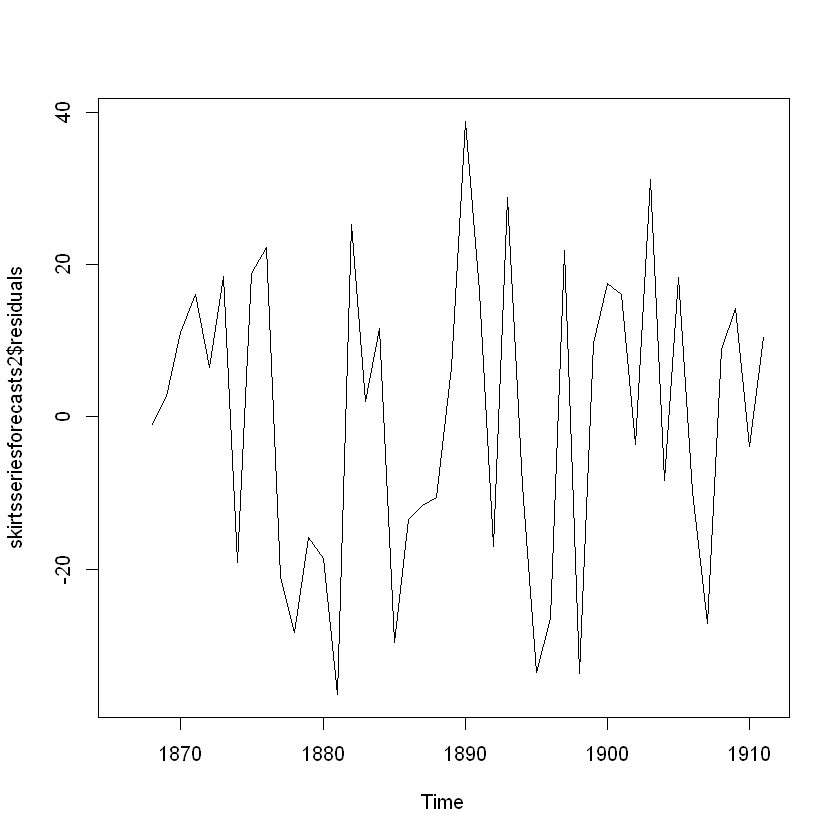

In [929]:
plot.ts(skirtsseriesforecasts2$residuals)  

In [930]:
residuals <- as.factor(skirtsseriesforecasts2$residuals)
residuals <- as.numeric(as.character(residuals[!is.na(residuals)]))

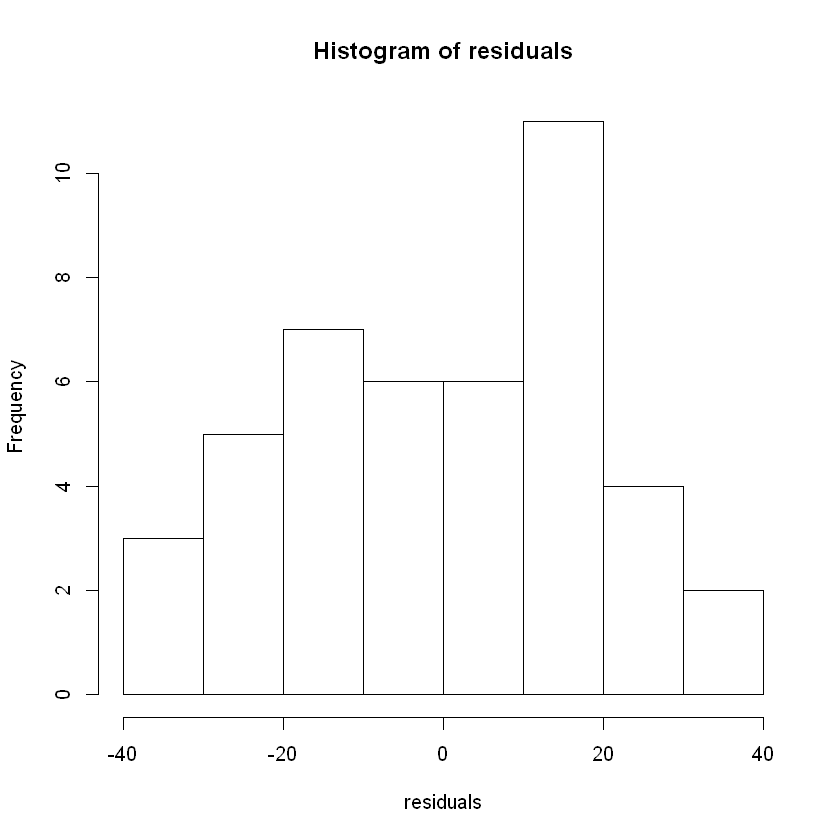

In [931]:
hist(residuals)

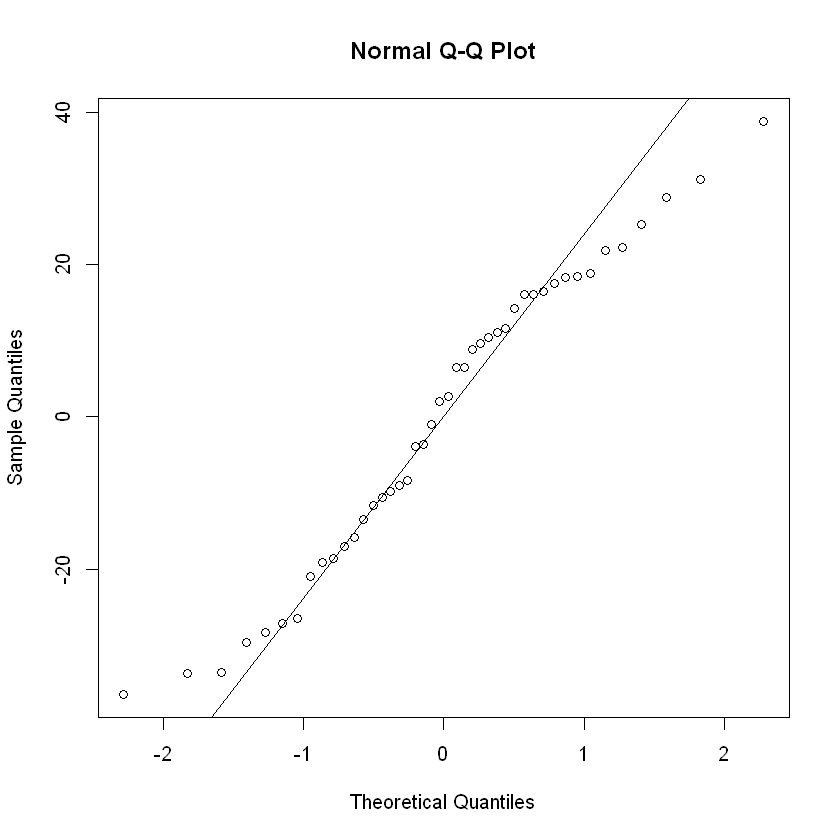

In [932]:
qqnorm(residuals); qqline(residuals)

In [933]:
mean(residuals)

[1] -0.08972015

The time plot of forecast errors shows that the forecast errors have roughly constant variance over time. The histogram of forecast errors show that it is plausible that the forecast errors are normally distributed with mean zero and constant variance.

Thus, the Ljung-Box test shows that there is little evidence of autocorrelations in the forecast errors, while the time plot and histogram of forecast errors show that it is plausible that the forecast errors are normally distributed with mean zero and constant variance. Therefore, we can conclude that Holt’s exponential smoothing provides an adequate predictive model for skirt hem diameters, which probably cannot be improved upon. In addition, it means that the assumptions that the 80% and 95% predictions intervals were based upon are probably valid.

## Holt-Winters Exponential Smoothing
If you have a time series that can be described using an additive model with increasing or decreasing trend and seasonality, you can use Holt-Winters exponential smoothing to make short-term forecasts.

Holt-Winters exponential smoothing estimates the level, slope and seasonal component at the current time point. Smoothing is controlled by three parameters: alpha, beta, and gamma, for the estimates of the level, slope b of the trend component, and the seasonal component, respectively, at the current time point. The parameters alpha, beta and gamma all have values between 0 and 1, and values that are close to 0 mean that relatively little weight is placed on the most recent observations when making forecasts of future values.

An example of a time series that can probably be described using an additive model with a trend and seasonality is the time series of the log of monthly sales for the souvenir shop at a beach resort town in Queensland, Australia (discussed above):



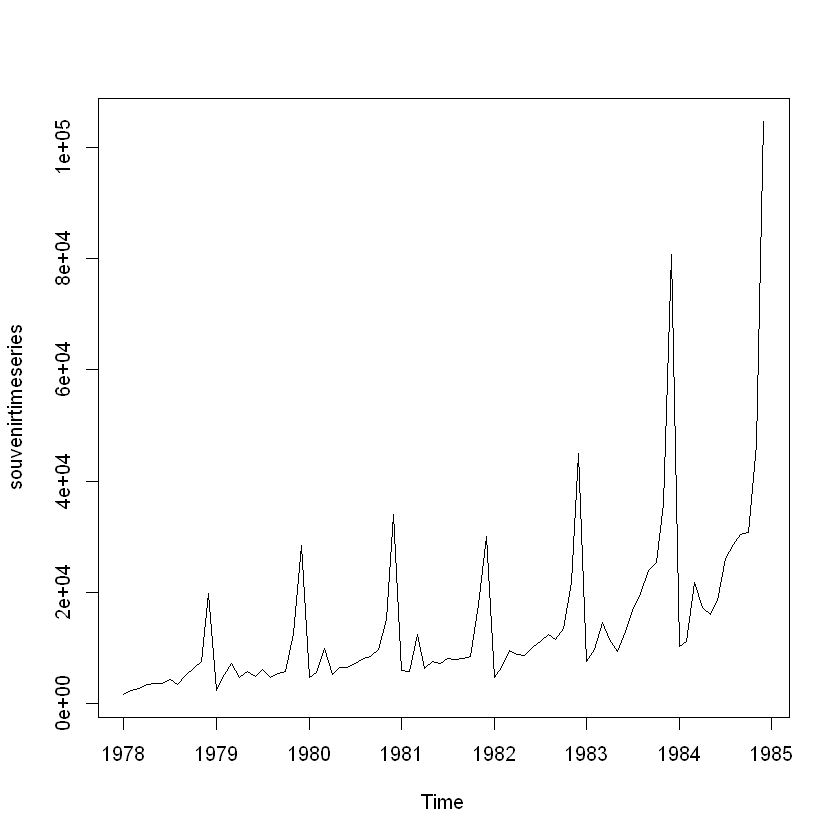

In [934]:
plot.ts(souvenirtimeseries)

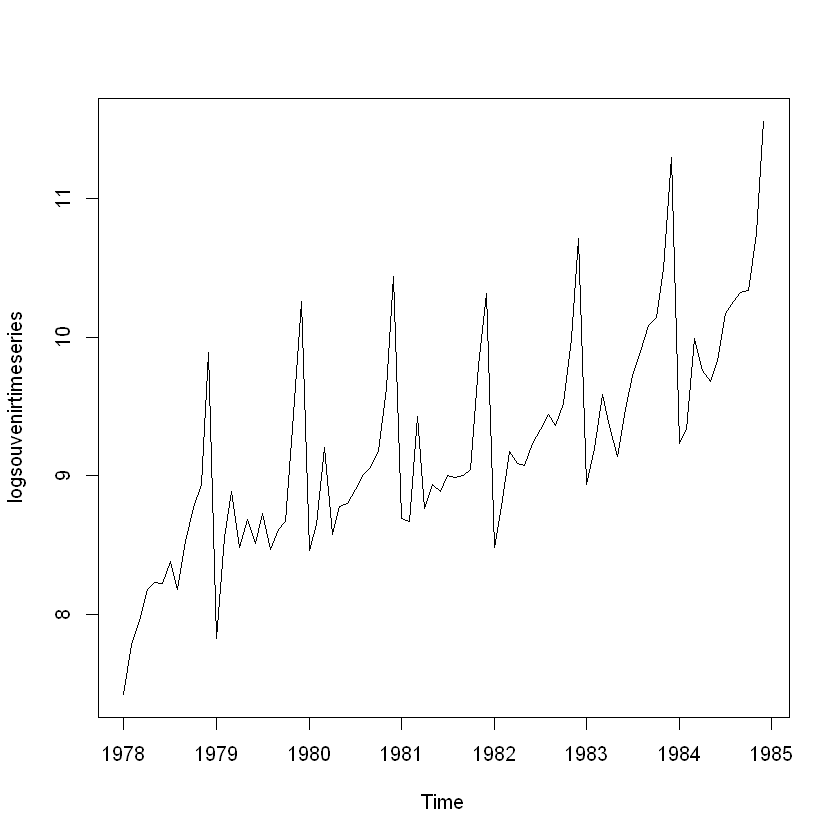

In [935]:
logsouvenirtimeseries <- log(souvenirtimeseries)

plot.ts(logsouvenirtimeseries)

To make forecasts, we can fit a predictive model using the HoltWinters() function. For example, to fit a predictive model for the log of the monthly sales in the souvenir shop, we type:

In [936]:
souvenirtimeseriesforecasts <- HoltWinters(logsouvenirtimeseries)

souvenirtimeseriesforecasts

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = logsouvenirtimeseries)

Smoothing parameters:
 alpha: 0.413418
 beta : 0
 gamma: 0.9561275

Coefficients:
           [,1]
a   10.37661961
b    0.02996319
s1  -0.80952063
s2  -0.60576477
s3   0.01103238
s4  -0.24160551
s5  -0.35933517
s6  -0.18076683
s7   0.07788605
s8   0.10147055
s9   0.09649353
s10  0.05197826
s11  0.41793637
s12  1.18088423

In [937]:
souvenirtimeseriesforecasts$SSE

[1] 2.011491

The estimated values of alpha, beta and gamma are 0.41, 0.00, and 0.96, respectively. The value of alpha (0.41) is relatively low, indicating that the estimate of the level at the current time point is based upon both recent observations and some observations in the more distant past. The value of beta is 0.00, indicating that the estimate of the slope b of the trend component is not updated over the time series, and instead is set equal to its initial value. This makes good intuitive sense, as the level changes quite a bit over the time series, but the slope b of the trend component remains roughly the same. In contrast, the value of gamma (0.96) is high, indicating that the estimate of the seasonal component at the current time point is just based upon very recent observations.

As for simple exponential smoothing and Holt’s exponential smoothing, we can plot the original time series as a black line, with the forecasted values as a red line on top of that:

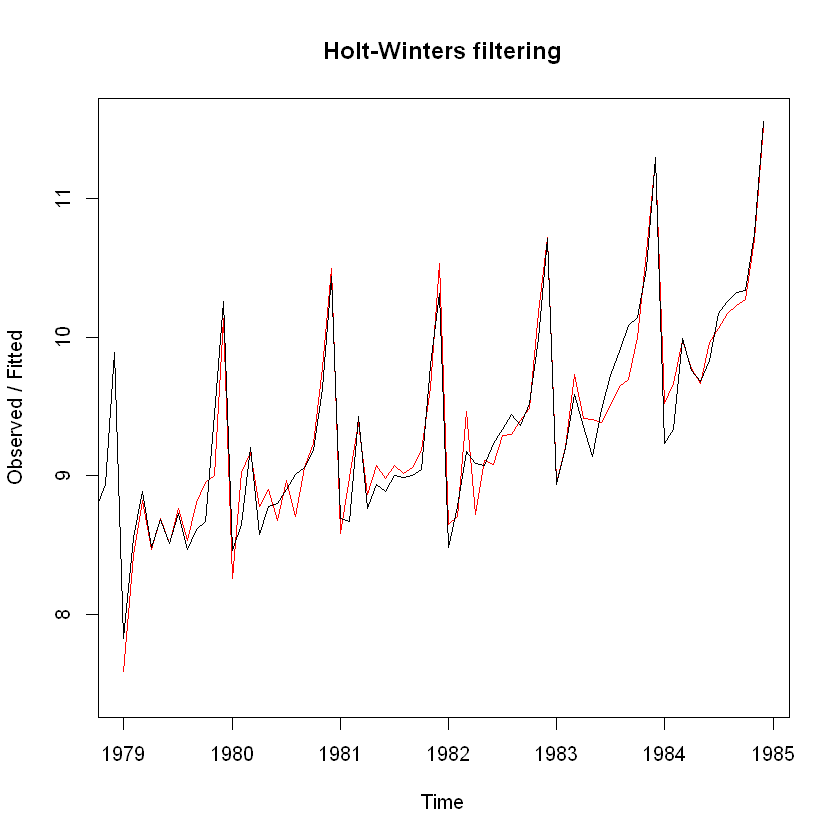

In [938]:
plot(souvenirtimeseriesforecasts)

We see from the plot that the Holt-Winters exponential method is very successful in predicting the seasonal peaks, which occur roughly in November every year.

To make forecasts for future times not included in the original time series, we use the “forecast.HoltWinters()” function in the “forecast” package. For example, the original data for the souvenir sales is from January 1987 to December 1993. If we wanted to make forecasts for January 1994 to December 1998 (48 more months), and plot the forecasts, we would type:

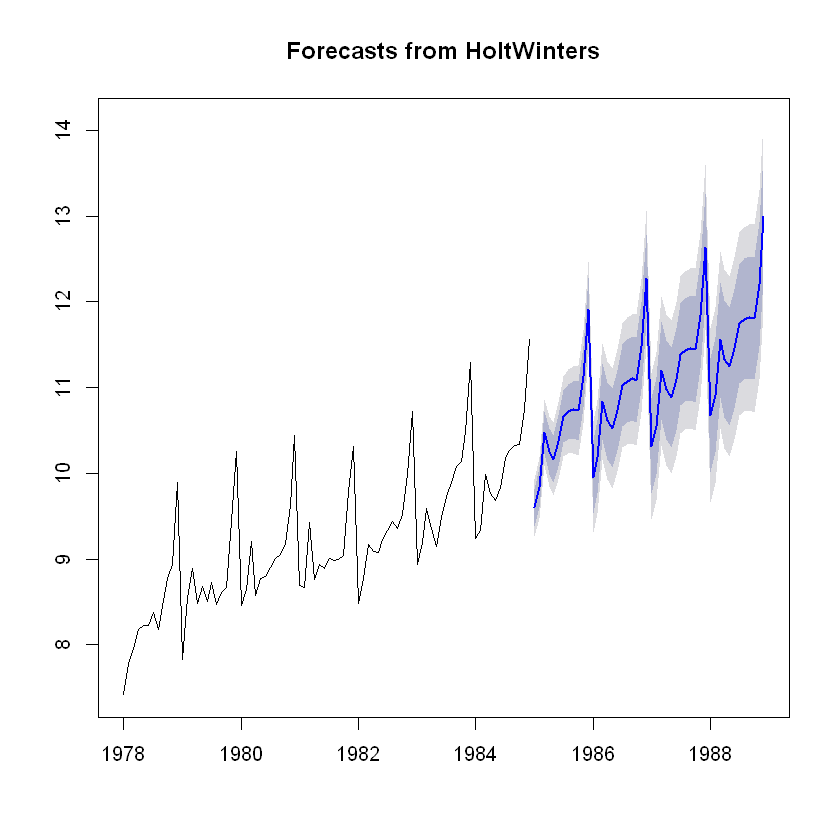

In [939]:
souvenirtimeseriesforecasts2 <- forecast:::forecast.HoltWinters(souvenirtimeseriesforecasts, h=48)

forecast:::plot.forecast(souvenirtimeseriesforecasts2)

The forecasts are shown as a blue line, and the purple and gray shaded areas show 80% and 95% prediction intervals, respectively.

We can investigate whether the predictive model can be improved upon by checking whether the in-sample forecast errors show non-zero autocorrelations at lags 1-20, by making a correlogram and carrying out the Ljung-Box test:

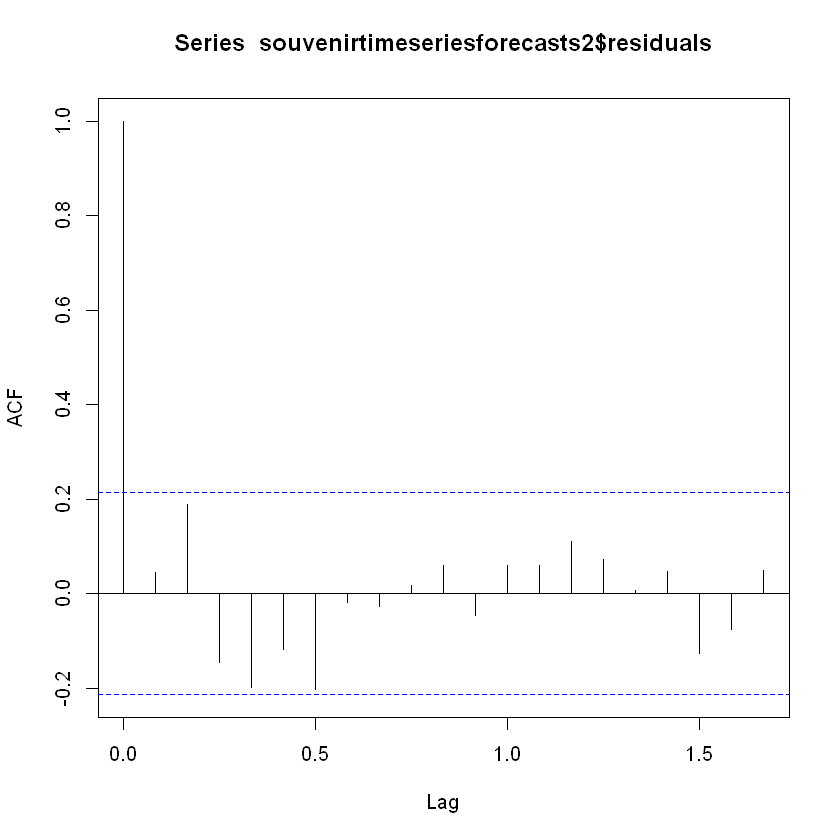

In [940]:
acf(souvenirtimeseriesforecasts2$residuals, lag.max=20, na.action = na.pass)

In [941]:
 Box.test(souvenirtimeseriesforecasts2$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  souvenirtimeseriesforecasts2$residuals
X-squared = 17.53, df = 20, p-value = 0.6183


The correlogram shows that the autocorrelations for the in-sample forecast errors do not exceed the significance bounds for lags 1-20. Furthermore, the p-value for Ljung-Box test is 0.6, indicating that there is little evidence of non-zero autocorrelations at lags 1-20.

We can check whether the forecast errors have constant variance over time, and are normally distributed with mean zero, by making a time plot of the forecast errors and a histogram (with overlaid normal curve):

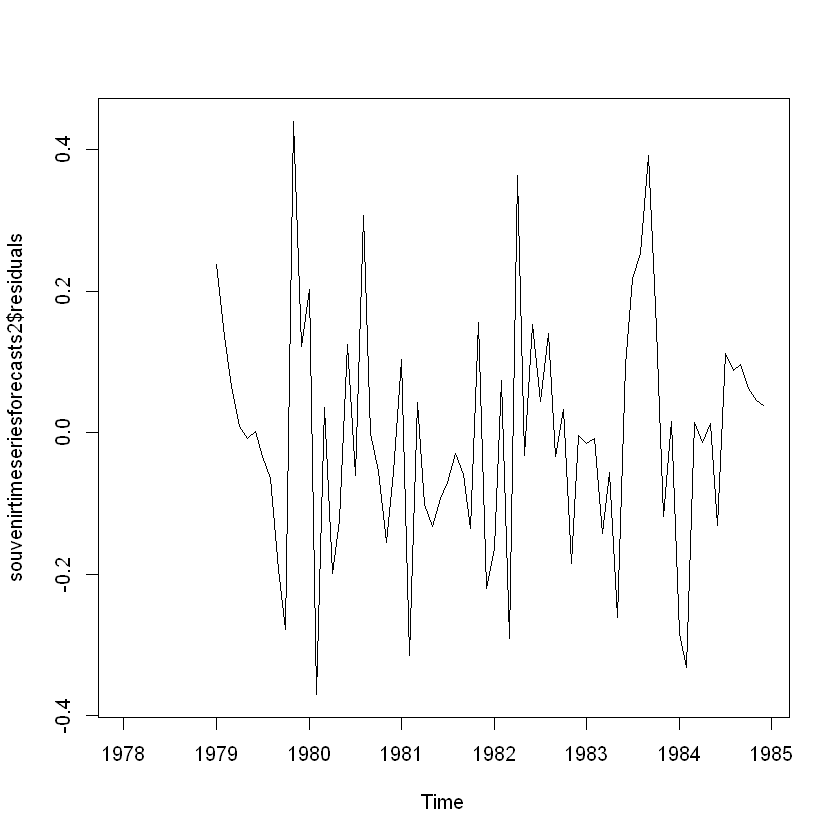

In [942]:
plot.ts(souvenirtimeseriesforecasts2$residuals)    

In [943]:
residuals <-  as.factor(souvenirtimeseriesforecasts2$residuals)
residuals <- as.numeric(as.character(residuals[!is.na(residuals)]))
residuals[1:10]

[1]  0.236882839  0.135577472  0.065287599  0.008093247 -0.008157195
 [6]  0.001642573 -0.034247449 -0.064901817 -0.193642935 -0.278375637

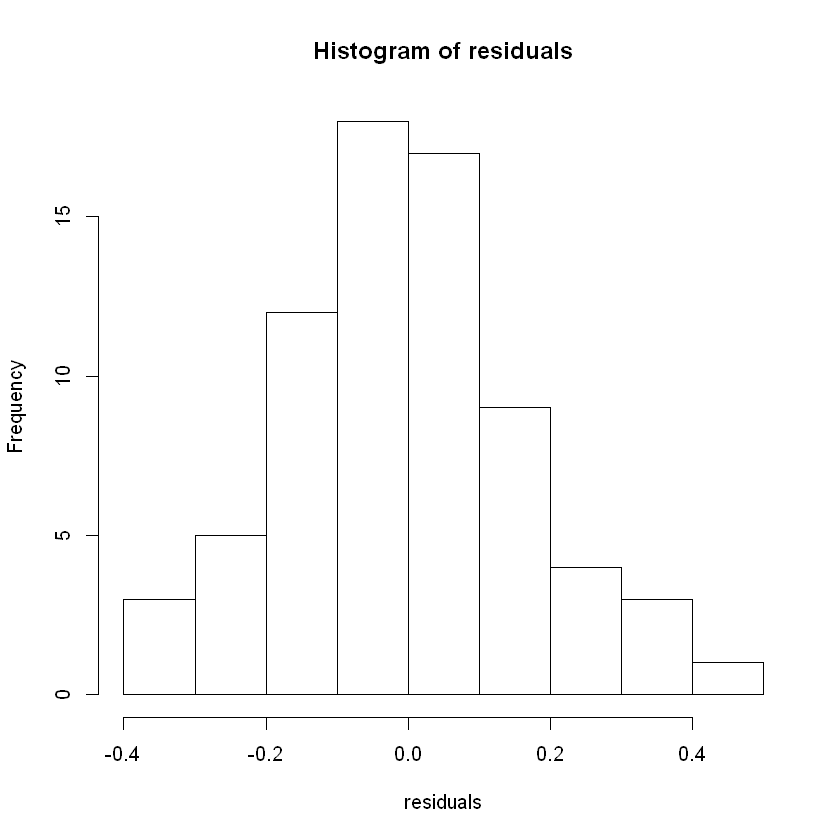

In [944]:
hist(residuals)

In [945]:
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.98618, p-value = 0.6187


In [946]:
mean(residuals)

[1] -0.006421623

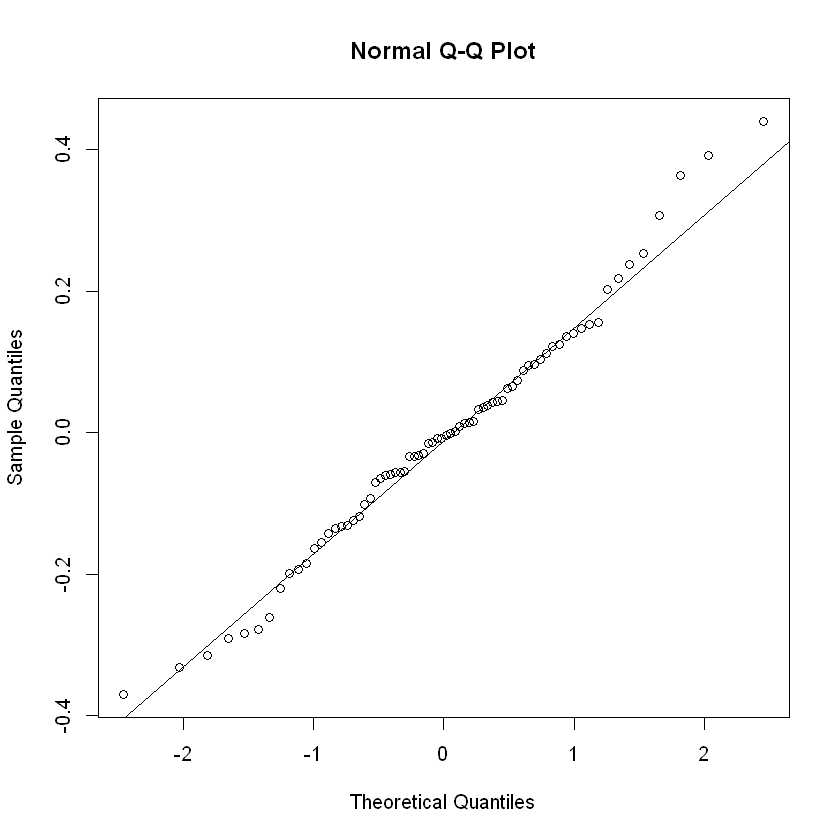

In [947]:
qqnorm(residuals); qqline(residuals)

From the time plot, it appears plausible that the forecast errors have constant variance over time. From the histogram of forecast errors, it seems plausible that the forecast errors are normally distributed with mean zero.

Thus,there is little evidence of autocorrelation at lags 1-20 for the forecast errors, and the forecast errors appear to be normally distributed with mean zero and constant variance over time. This suggests that Holt-Winters exponential smoothing provides an adequate predictive model of the log of sales at the souvenir shop, which probably cannot be improved upon. Furthermore, the assumptions upon which the prediction intervals were based are probably valid.

## ARIMA Models
Exponential smoothing methods are useful for making forecasts, and make no assumptions about the correlations between successive values of the time series. However, if you want to make prediction intervals for forecasts made using exponential smoothing methods, the prediction intervals require that the forecast errors are uncorrelated and are normally distributed with mean zero and constant variance.

While exponential smoothing methods do not make any assumptions about correlations between successive values of the time series, in some cases you can make a better predictive model by taking correlations in the data into account. Autoregressive Integrated Moving Average (ARIMA) models include an explicit statistical model for the irregular component of a time series, that allows for non-zero autocorrelations in the irregular component.

### Differencing a Time Series
ARIMA models are defined for stationary time series. Therefore, if you start off with a non-stationary time series, you will first need to ‘difference’ the time series until you obtain a stationary time series. If you have to difference the time series d times to obtain a stationary series, then you have an ARIMA(p,d,q) model, where d is the order of differencing used.

You can difference a time series using the “diff()” function in R. For example, the time series of the annual diameter of women’s skirts at the hem, from 1866 to 1911 is not stationary in mean, as the level changes a lot over time:

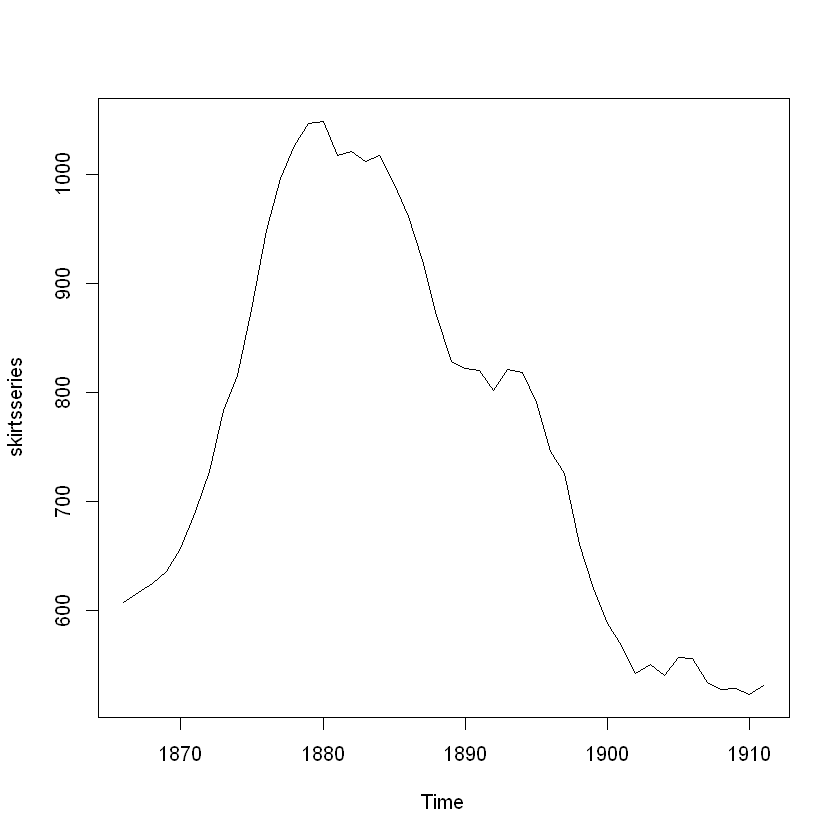

In [948]:
plot.ts(skirtsseries)

We can difference the time series (which we stored in “skirtsseries”, see above) once, and plot the differenced series, by typing:

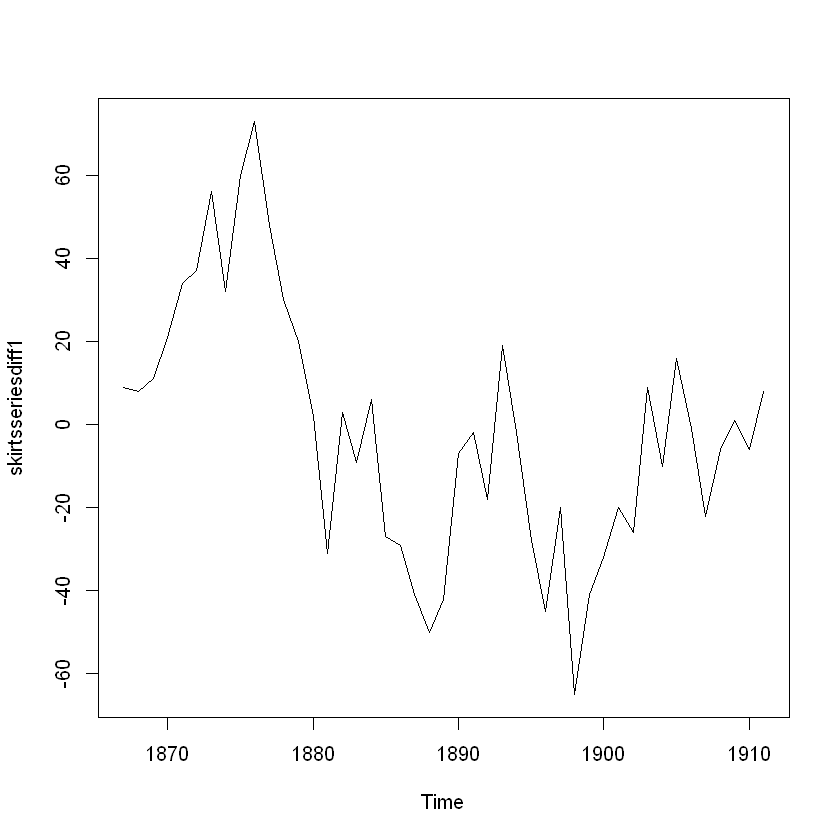

In [949]:
skirtsseriesdiff1 <- diff(skirtsseries, differences=1)
plot.ts(skirtsseriesdiff1)

In [950]:
skirts[1:10]

[1] 608 617 625 636 657 691 728 784 816 876

In [951]:
skirtsseriesdiff1

Time Series:
Start = 1867 
End = 1911 
Frequency = 1 
 [1]   9   8  11  21  34  37  56  32  60  73  48  30  20   2 -31   3  -9   6 -27
[20] -29 -41 -50 -42  -7  -2 -18  19  -2 -28 -45 -20 -65 -41 -32 -20 -26   9 -10
[39]  16  -1 -22  -6   1  -6   8

The resulting time series of first differences (above) does not appear to be stationary in mean. Therefore, we can difference the time series twice, to see if that gives us a stationary time series:

In [952]:
skirtsseriesdiff2 <- diff(skirtsseries, differences=2)

In [953]:
skirtsseriesdiff1

Time Series:
Start = 1867 
End = 1911 
Frequency = 1 
 [1]   9   8  11  21  34  37  56  32  60  73  48  30  20   2 -31   3  -9   6 -27
[20] -29 -41 -50 -42  -7  -2 -18  19  -2 -28 -45 -20 -65 -41 -32 -20 -26   9 -10
[39]  16  -1 -22  -6   1  -6   8

In [954]:
skirtsseriesdiff2

Time Series:
Start = 1868 
End = 1911 
Frequency = 1 
 [1]  -1   3  10  13   3  19 -24  28  13 -25 -18 -10 -18 -33  34 -12  15 -33  -2
[20] -12  -9   8  35   5 -16  37 -21 -26 -17  25 -45  24   9  12  -6  35 -19  26
[39] -17 -21  16   7  -7  14

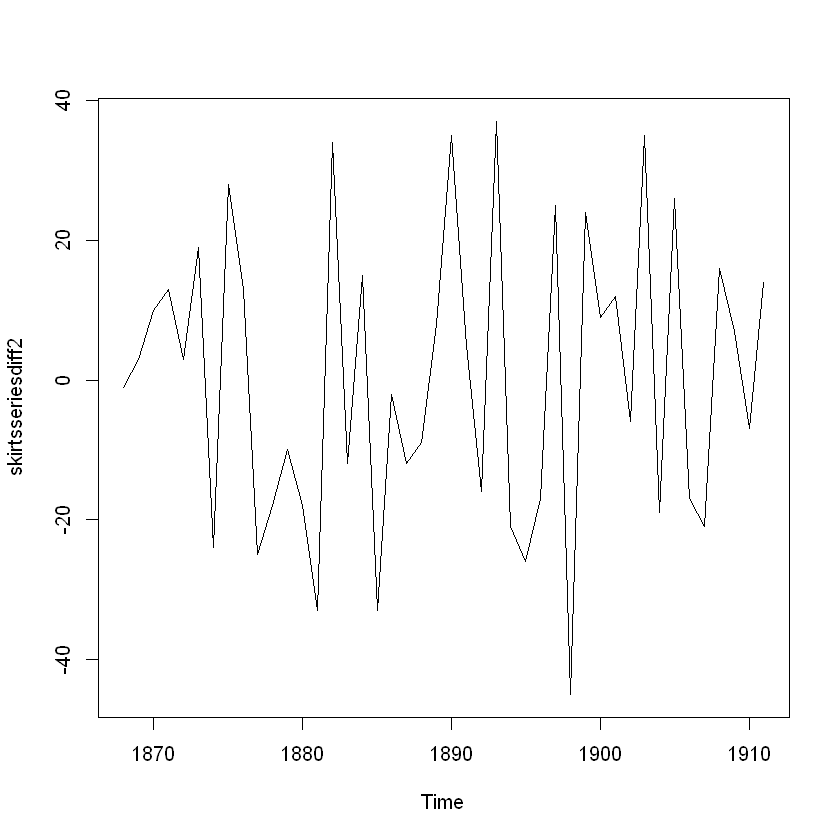

In [955]:
plot.ts(skirtsseriesdiff2)

The time series of second differences (above) does appear to be stationary in mean and variance, as the level of the series stays roughly constant over time, and the variance of the series appears roughly constant over time. Thus, it appears that we need to difference the time series of the diameter of skirts twice in order to achieve a stationary series.

#### Formal tests for stationarity
- Formal tests for stationarity called “unit root tests” are available in the fUnitRoots package, available on CRAN, but will not be discussed here.

If you need to difference your original time series data d times in order to obtain a stationary time series, this means that you can use an ARIMA(p,d,q) model for your time series, where d is the order of differencing used. For example, for the time series of the diameter of women’s skirts, we had to difference the time series twice, and so the order of differencing (d) is 2. This means that you can use an ARIMA(p,2,q) model for your time series. The next step is to figure out the values of p and q for the ARIMA model.

Another example is the time series of the age of death of the successive kings of England (see above):

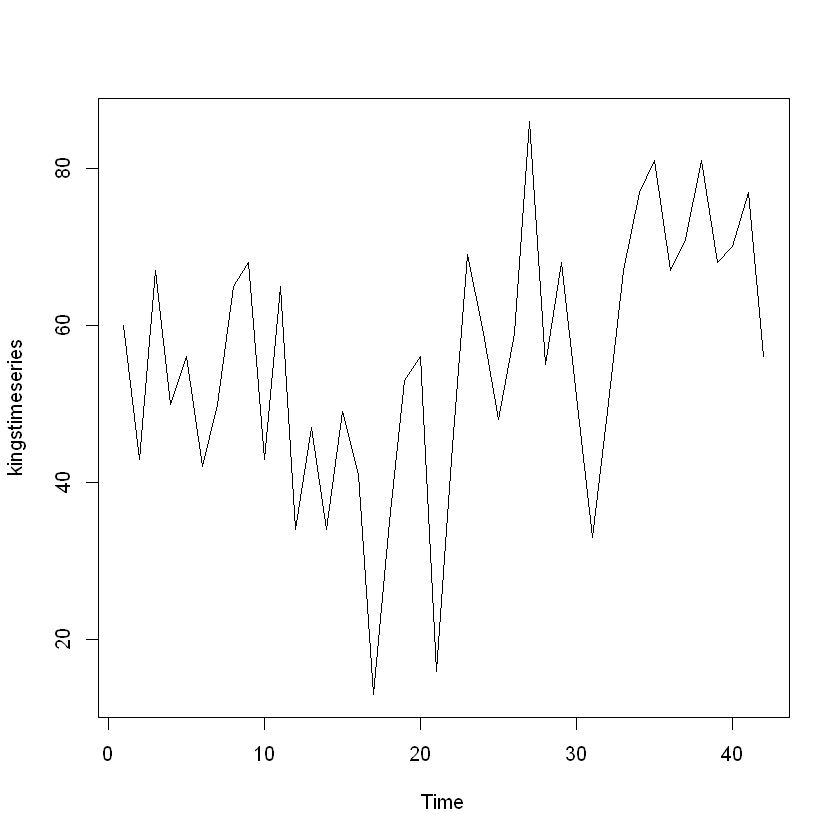

In [956]:
plot.ts(kingstimeseries)

From the time plot (above), we can see that the time series is not stationary in mean. To calculate the time series of first differences, and plot it, we type:

In [957]:
kingtimeseriesdiff1 <- diff(kingstimeseries, differences=1)

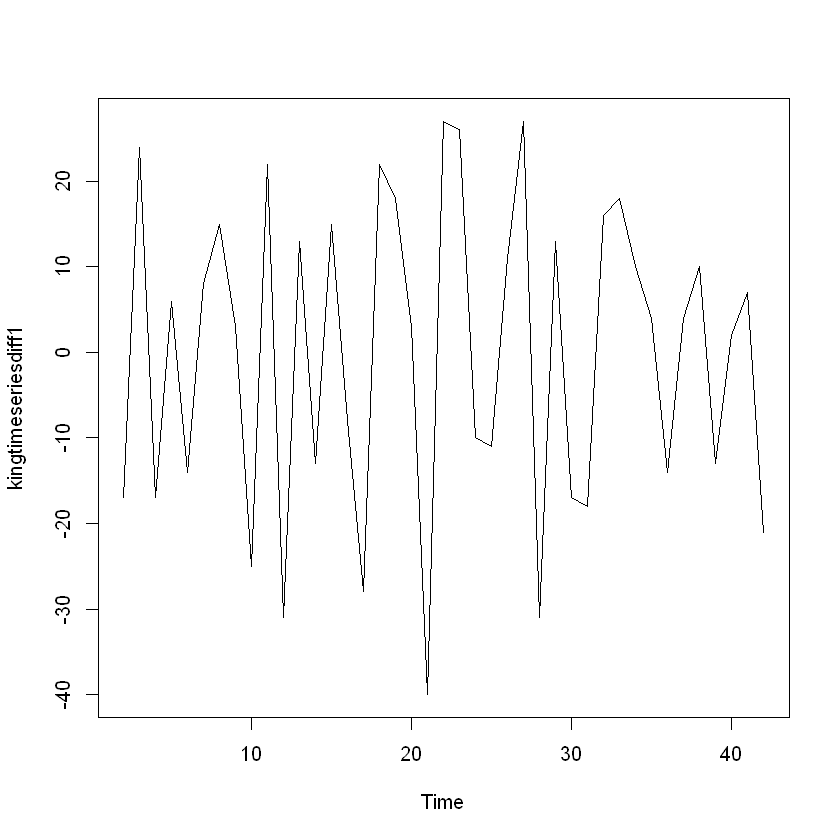

In [958]:
plot.ts(kingtimeseriesdiff1)

The time series of first differences appears to be stationary in mean and variance, and so an ARIMA(p,1,q) model is probably appropriate for the time series of the age of death of the kings of England. By taking the time series of first differences, we have removed the trend component of the time series of the ages at death of the kings, and are left with an irregular component. We can now examine whether there are correlations between successive terms of this irregular component; if so, this could help us to make a predictive model for the ages at death of the kings.

### Selecting a Candidate ARIMA Model
If your time series is stationary, or if you have transformed it to a stationary time series by differencing d times, the next step is to select the appropriate ARIMA model, which means finding the values of most appropriate values of p and q for an ARIMA(p,d,q) model. To do this, you usually need to examine the correlogram and partial correlogram of the stationary time series.

To plot a correlogram and partial correlogram, we can use the “acf()” and “pacf()” functions in R, respectively. To get the actual values of the autocorrelations and partial autocorrelations, we set “plot=FALSE” in the “acf()” and “pacf()” functions.

 #### Example of the Ages at Death of the Kings of England
For example, to plot the correlogram for lags 1-20 of the once differenced time series of the ages at death of the kings of England, and to get the values of the autocorrelations, we type:

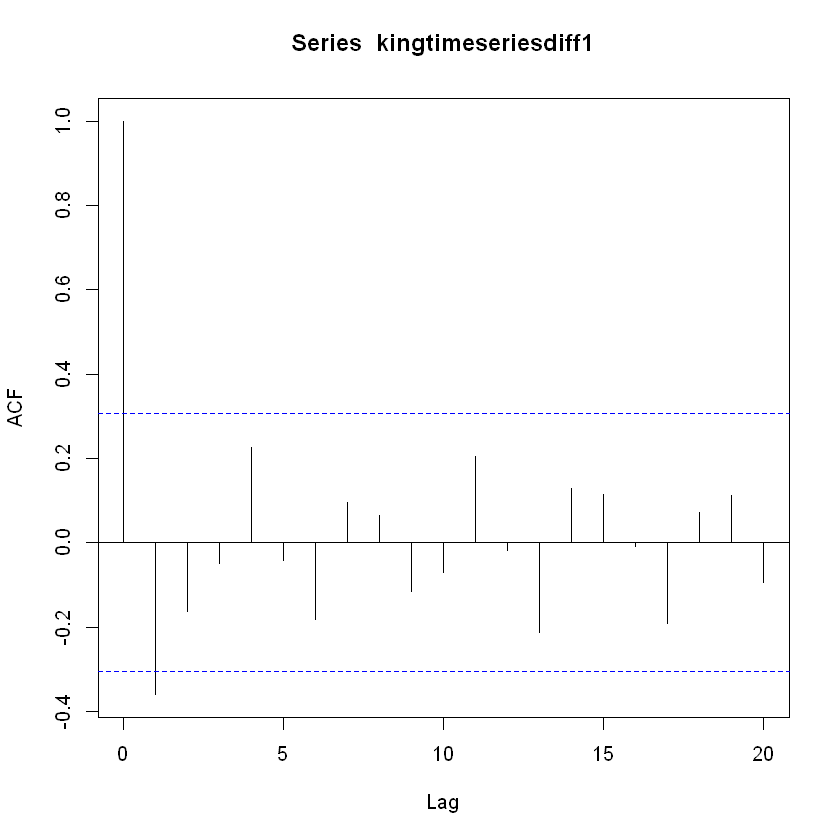

In [959]:
acf(kingtimeseriesdiff1, lag.max=20)             # plot a correlogram

In [960]:
acf(kingtimeseriesdiff1, lag.max=20, plot=FALSE) # get the autocorrelation values


Autocorrelations of series 'kingtimeseriesdiff1', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.360 -0.162 -0.050  0.227 -0.042 -0.181  0.095  0.064 -0.116 -0.071 
    11     12     13     14     15     16     17     18     19     20 
 0.206 -0.017 -0.212  0.130  0.114 -0.009 -0.192  0.072  0.113 -0.093 

We see from the correlogram that the autocorrelation at lag 1 (-0.360) exceeds the significance bounds, but all other autocorrelations between lags 1-20 do not exceed the significance bounds.

To plot the partial correlogram for lags 1-20 for the once differenced time series of the ages at death of the English kings, and get the values of the partial autocorrelations, we use the “pacf()” function, by typing:

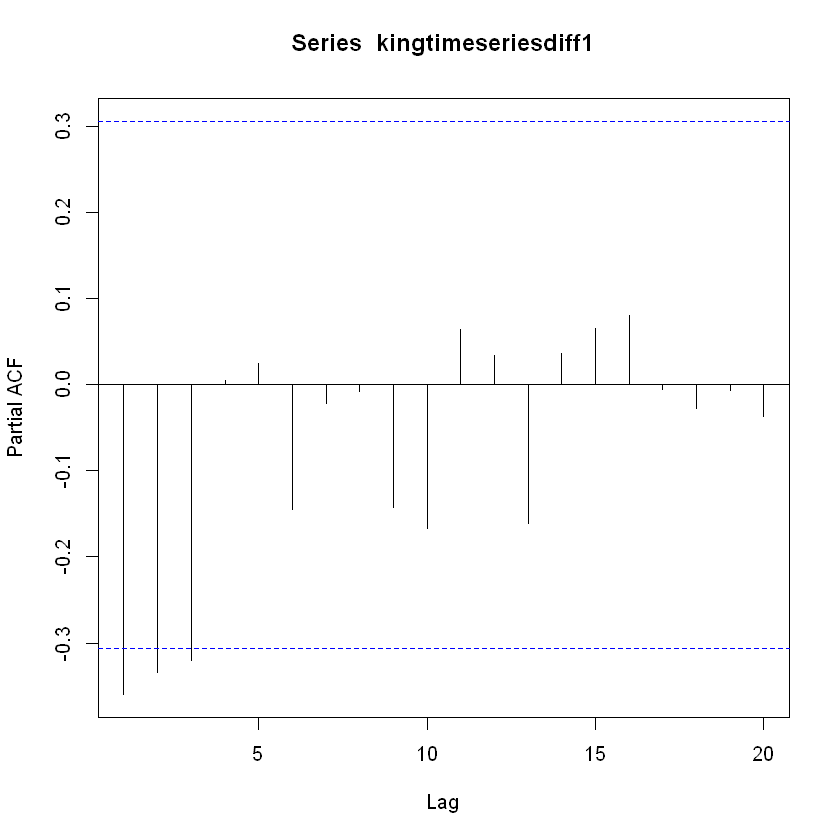

In [961]:
pacf(kingtimeseriesdiff1, lag.max=20)             # plot a partial correlogram

In [962]:
pacf(kingtimeseriesdiff1, lag.max=20, plot=FALSE) # get the partial autocorrelation values


Partial autocorrelations of series 'kingtimeseriesdiff1', by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.360 -0.335 -0.321  0.005  0.025 -0.144 -0.022 -0.007 -0.143 -0.167  0.065 
    12     13     14     15     16     17     18     19     20 
 0.034 -0.161  0.036  0.066  0.081 -0.005 -0.027 -0.006 -0.037 

The partial correlogram shows that the partial autocorrelations at lags 1, 2 and 3 exceed the significance bounds, are negative, and are slowly decreasing in magnitude with increasing lag (lag 1: -0.360, lag 2: -0.335, lag 3:-0.321). The partial autocorrelations tail off to zero after lag 3.

Since the correlogram is zero after lag 1, and the partial correlogram tails off to zero after lag 3, this means that the following ARMA (autoregressive moving average) models are possible for the time series of first differences:

* An ARMA(3,0) model, that is, an autoregressive model of order p=3, since the partial autocorrelogram is zero after lag 3, and the autocorrelogram tails off to zero (although perhaps too abruptly for this model to be appropriate)
* An ARMA(0,1) model, that is, a moving average model of order q=1, since the autocorrelogram is zero after lag 1 and the partial autocorrelogram tails off to zero
* An ARMA(p,q) model, that is, a mixed model with p and q greater than 0, since the autocorrelogram and partial correlogram tail off to zero (although the correlogram probably tails off to zero too abruptly for this model to be appropriate)

We use the principle of parsimony to decide which model is best: that is, we assume that the model with the fewest parameters is best. The ARMA(3,0) model has 3 parameters, the ARMA(0,1) model has 1 parameter, and the ARMA(p,q) model has at least 2 parameters. Therefore, the ARMA(0,1) model is taken as the best model.

An ARMA(0,1) model is a moving average model of order 1, or MA(1) model. This model can be written as: X_t - mu = Z_t - (theta * Z_t-1), where X_t is the stationary time series we are studying (the first differenced series of ages at death of English kings), mu is the mean of time series X_t, Z_t is white noise with mean zero and constant variance, and theta is a parameter that can be estimated.

A MA (moving average) model is usually used to model a time series that shows short-term dependencies between successive observations. Intuitively, it makes good sense that a MA model can be used to describe the irregular component in the time series of ages at death of English kings, as we might expect the age at death of a particular English king to have some effect on the ages at death of the next king or two, but not much effect on the ages at death of kings that reign much longer after that.

Shortcut: the auto.arima() function

The auto.arima() function can be used to find the appropriate ARIMA model, eg., type “library(forecast)”, then “auto.arima(kings)”. The output says an appropriate model is ARIMA(0,1,1).

Since an ARMA(0,1) model (with p=0, q=1) is taken to be the best candidate model for the time series of first differences of the ages at death of English kings, then the original time series of the ages of death can be modelled using an ARIMA(0,1,1) model (with p=0, d=1, q=1, where d is the order of differencing required).

#### Shortcut: the auto.arima() function

* The auto.arima() function can be used to find the appropriate ARIMA model, eg., type “library(forecast)”, then “auto.arima(kings)”. The output says an appropriate model is ARIMA(0,1,1).

In [963]:
forecast:::auto.arima(kingstimeseries)

Series: kingstimeseries 
ARIMA(0,1,1) 

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 236.2:  log likelihood=-170.06
AIC=344.13   AICc=344.44   BIC=347.56

### Example of the Volcanic Dust Veil in the Northern Hemisphere
Let’s take another example of selecting an appropriate ARIMA model. The file file http://robjhyndman.com/tsdldata/annual/dvi.dat contains data on the volcanic dust veil index in the northern hemisphere, from 1500-1969 (original data from Hipel and Mcleod, 1994). This is a measure of the impact of volcanic eruptions’ release of dust and aerosols into the environment. We can read it into R and make a time plot by typing:

In [964]:
volcanodust <- scan("http://robjhyndman.com/tsdldata/annual/dvi.dat", skip=1)

In [965]:
volcanodustseries <- ts(volcanodust,start=c(1500))

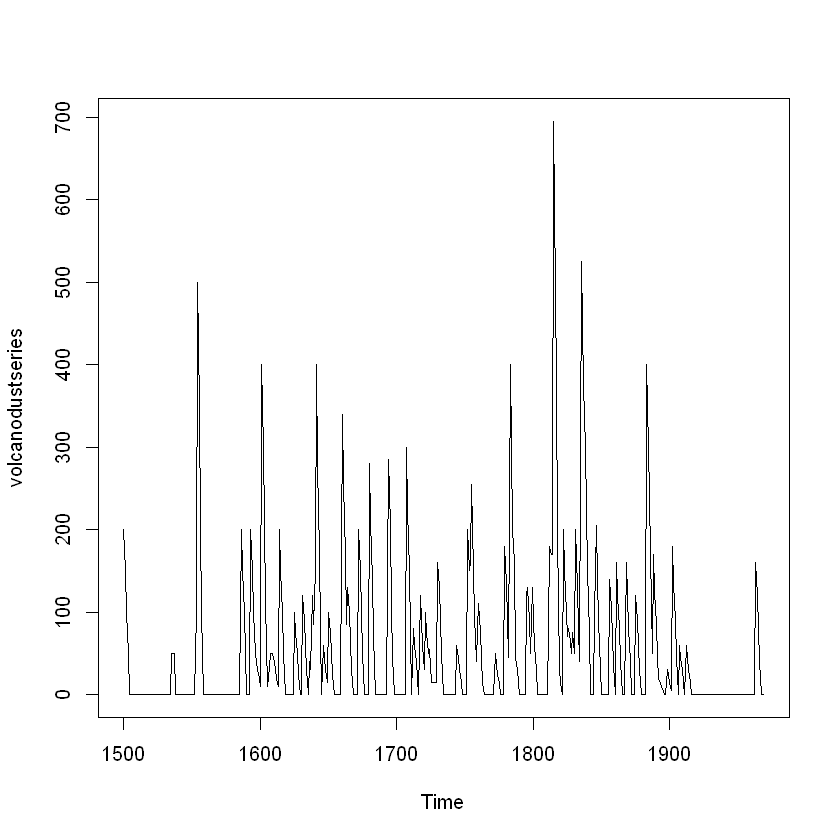

In [966]:
plot.ts(volcanodustseries)

From the time plot, it appears that the random fluctuations in the time series are roughly constant in size over time, so an additive model is probably appropriate for describing this time series.

Furthermore, the time series appears to be stationary in mean and variance, as its level and variance appear to be roughly constant over time. Therefore, we do not need to difference this series in order to fit an ARIMA model, but can fit an ARIMA model to the original series (the order of differencing required, d, is zero here).

We can now plot a correlogram and partial correlogram for lags 1-20 to investigate what ARIMA model to use:

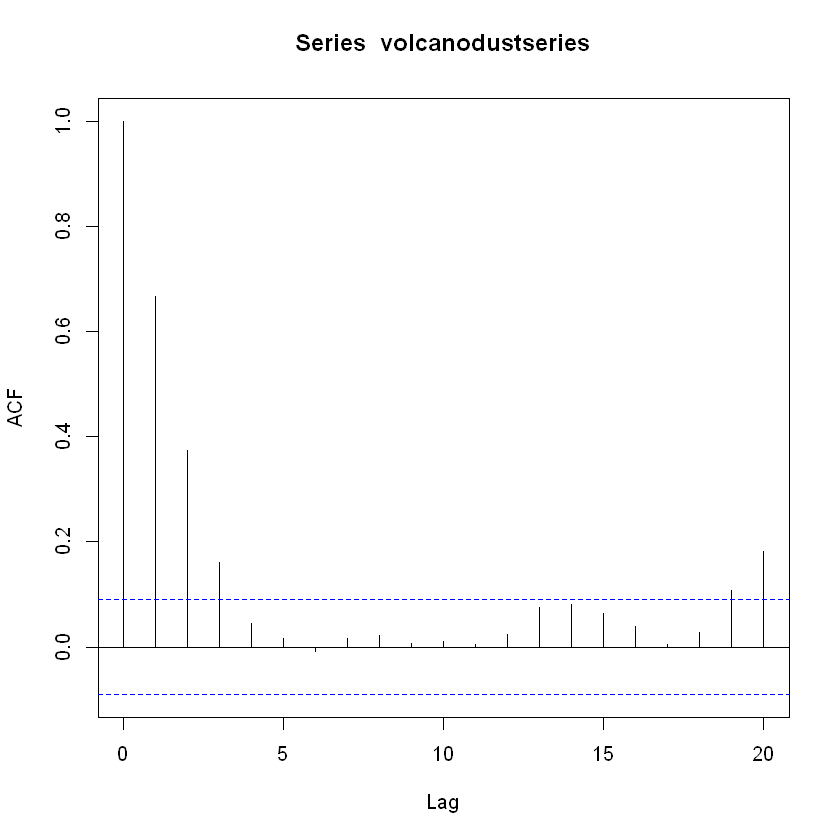

In [967]:
acf(volcanodustseries, lag.max=20)             # plot a correlogram

In [968]:
acf(volcanodustseries, lag.max=20, plot=FALSE) # get the values of the autocorrelations


Autocorrelations of series 'volcanodustseries', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000  0.666  0.374  0.162  0.046  0.017 -0.007  0.016  0.021  0.006  0.010 
    11     12     13     14     15     16     17     18     19     20 
 0.004  0.024  0.075  0.082  0.064  0.039  0.005  0.028  0.108  0.182 

We see from the correlogram that the autocorrelations for lags 1, 2 and 3 exceed the significance bounds, and that the autocorrelations tail off to zero after lag 3. The autocorrelations for lags 1, 2, 3 are positive, and decrease in magnitude with increasing lag (lag 1: 0.666, lag 2: 0.374, lag 3: 0.162).

The autocorrelation for lags 19 and 20 exceed the significance bounds too, but it is likely that this is due to chance, since they just exceed the significance bounds (especially for lag 19), the autocorrelations for lags 4-18 do not exceed the signifiance bounds, and we would expect 1 in 20 lags to exceed the 95% significance bounds by chance alone.

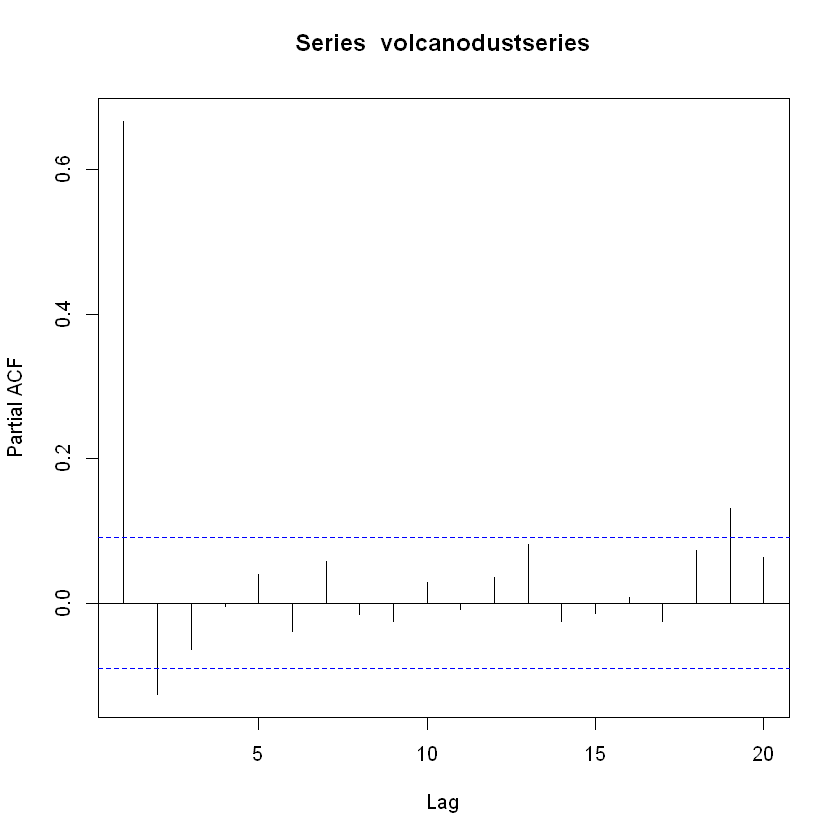

In [969]:
pacf(volcanodustseries, lag.max=20)

In [970]:
pacf(volcanodustseries, lag.max=20, plot=FALSE)


Partial autocorrelations of series 'volcanodustseries', by lag

     1      2      3      4      5      6      7      8      9     10     11 
 0.666 -0.126 -0.064 -0.005  0.040 -0.039  0.058 -0.016 -0.025  0.028 -0.008 
    12     13     14     15     16     17     18     19     20 
 0.036  0.082 -0.025 -0.014  0.008 -0.025  0.073  0.131  0.063 

From the partial autocorrelogram, we see that the partial autocorrelation at lag 1 is positive and exceeds the significance bounds (0.666), while the partial autocorrelation at lag 2 is negative and also exceeds the significance bounds (-0.126). The partial autocorrelations tail off to zero after lag 2.

Since the correlogram tails off to zero after lag 3, and the partial correlogram is zero after lag 2, the following ARMA models are possible for the time series:

* an ARMA(2,0) model, since the partial autocorrelogram is zero after lag 2, and the correlogram tails off to zero after lag 3, and the partial correlogram is zero after lag 2
* an ARMA(0,3) model, since the autocorrelogram is zero after lag 3, and the partial correlogram tails off to zero (although perhaps too abruptly for this model to be appropriate)
* an ARMA(p,q) mixed model, since the correlogram and partial correlogram tail off to zero (although the partial correlogram perhaps tails off too abruptly for this model to be appropriate)

The ARMA(2,0) model has 2 parameters, the ARMA(0,3) model has 3 parameters, and the ARMA(p,q) model has at least 2 parameters. Therefore, using the principle of parsimony, the ARMA(2,0) model and ARMA(p,q) model are equally good candidate models.

An ARMA(2,0) model is an autoregressive model of order 2, or AR(2) model. This model can be written as: X_t - mu = (Beta1 * (X_t-1 - mu)) + (Beta2 * (Xt-2 - mu)) + Z_t, where X_t is the stationary time series we are studying (the time series of volcanic dust veil index), mu is the mean of time series X_t, Beta1 and Beta2 are parameters to be estimated, and Z_t is white noise with mean zero and constant variance.

An AR (autoregressive) model is usually used to model a time series which shows longer term dependencies between successive observations. Intuitively, it makes sense that an AR model could be used to describe the time series of volcanic dust veil index, as we would expect volcanic dust and aerosol levels in one year to affect those in much later years, since the dust and aerosols are unlikely to disappear quickly.

If an ARMA(2,0) model (with p=2, q=0) is used to model the time series of volcanic dust veil index, it would mean that an ARIMA(2,0,0) model can be used (with p=2, d=0, q=0, where d is the order of differencing required). Similarly, if an ARMA(p,q) mixed model is used, where p and q are both greater than zero, than an ARIMA(p,0,q) model can be used.

#### Shortcut: the auto.arima() function

Again, we can use auto.arima() to find an appropriate model, by typing “auto.arima(volcanodust)”, which gives us ARIMA(1,0,2), which has 3 parameters. However, different criteria can be used to select a model (see auto.arima() help page). If we use the “bic” criterion, which penalises the number of parameters, we get ARIMA(2,0,0), which is ARMA(2,0): “auto.arima(volcanodust,ic=”bic”)”.

In [971]:
forecast:::auto.arima(volcanodustseries, ic='bic')

Series: volcanodustseries 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2     mean
      0.7533  -0.1268  57.5274
s.e.  0.0457   0.0458   8.5958

sigma^2 estimated as 4901:  log likelihood=-2662.54
AIC=5333.09   AICc=5333.17   BIC=5349.7

In [972]:
forecast:::auto.arima(volcanodustseries)

Series: volcanodustseries 
ARIMA(1,0,2) with non-zero mean 

Coefficients:
         ar1     ma1     ma2     mean
      0.4723  0.2694  0.1279  57.5178
s.e.  0.0936  0.0969  0.0752   8.4883

sigma^2 estimated as 4897:  log likelihood=-2661.84
AIC=5333.68   AICc=5333.81   BIC=5354.45

### Forecasting Using an ARIMA Model
Once you have selected the best candidate ARIMA(p,d,q) model for your time series data, you can estimate the parameters of that ARIMA model, and use that as a predictive model for making forecasts for future values of your time series.

You can estimate the parameters of an ARIMA(p,d,q) model using the “arima()” function in R.

##### Example of the Ages at Death of the Kings of England
For example, we discussed above that an ARIMA(0,1,1) model seems a plausible model for the ages at deaths of the kings of England. You can specify the values of p, d and q in the ARIMA model by using the “order” argument of the “arima()” function in R. To fit an ARIMA(p,d,q) model to this time series (which we stored in the variable “kingstimeseries”, see above), we type:

In [973]:
kingstimeseriesarima <- arima(kingstimeseries, order=c(0,1,1)) # fit an ARIMA(0,1,1) model

kingstimeseriesarima


Call:
arima(x = kingstimeseries, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 230.4:  log likelihood = -170.06,  aic = 344.13

As mentioned above, if we are fitting an ARIMA(0,1,1) model to our time series, it means we are fitting an an ARMA(0,1) model to the time series of first differences. An ARMA(0,1) model can be written X_t - mu = Z_t - (theta * Z_t-1), where theta is a parameter to be estimated. From the output of the “arima()” R function (above), the estimated value of theta (given as ‘ma1’ in the R output) is -0.7218 in the case of the ARIMA(0,1,1) model fitted to the time series of ages at death of kings.

We can then use the ARIMA model to make forecasts for future values of the time series, using the “forecast.Arima()” function in the “forecast” R package. For example, to forecast the ages at death of the next five English kings, we type:

In [974]:
kingstimeseriesforecasts <- forecast:::forecast.Arima(kingstimeseriesarima, h=5)

kingstimeseriesforecasts

   Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
43       67.75063 48.29647 87.20479 37.99806  97.50319
44       67.75063 47.55748 87.94377 36.86788  98.63338
45       67.75063 46.84460 88.65665 35.77762  99.72363
46       67.75063 46.15524 89.34601 34.72333 100.77792
47       67.75063 45.48722 90.01404 33.70168 101.79958

##### Specifying the confidence level for prediction intervals

* You can specify the confidence level for prediction intervals in forecast.Arima() by using the “level” argument. For example, to get a 99.5% prediction interval, we would type “forecast.Arima(kingstimeseriesarima, h=5, level=c(99.5))”.

In [975]:
forecast:::forecast.Arima(kingstimeseriesarima, h=5, level=c(99.5))

   Point Forecast  Lo 99.5  Hi 99.5
43       67.75063 25.13941 110.3618
44       67.75063 23.52078 111.9805
45       67.75063 21.95932 113.5419
46       67.75063 20.44939 115.0519
47       67.75063 18.98618 116.5151

The original time series for the English kings includes the ages at death of 42 English kings. The forecast.Arima() function gives us a forecast of the age of death of the next five English kings (kings 43-47), as well as 80% and 95% prediction intervals for those predictions. The age of death of the 42nd English king was 56 years (the last observed value in our time series), and the ARIMA model gives the forecasted age at death of the next five kings as 67.8 years.

We can plot the observed ages of death for the first 42 kings, as well as the ages that would be predicted for these 42 kings and for the next 5 kings using our ARIMA(0,1,1) model, by typing:

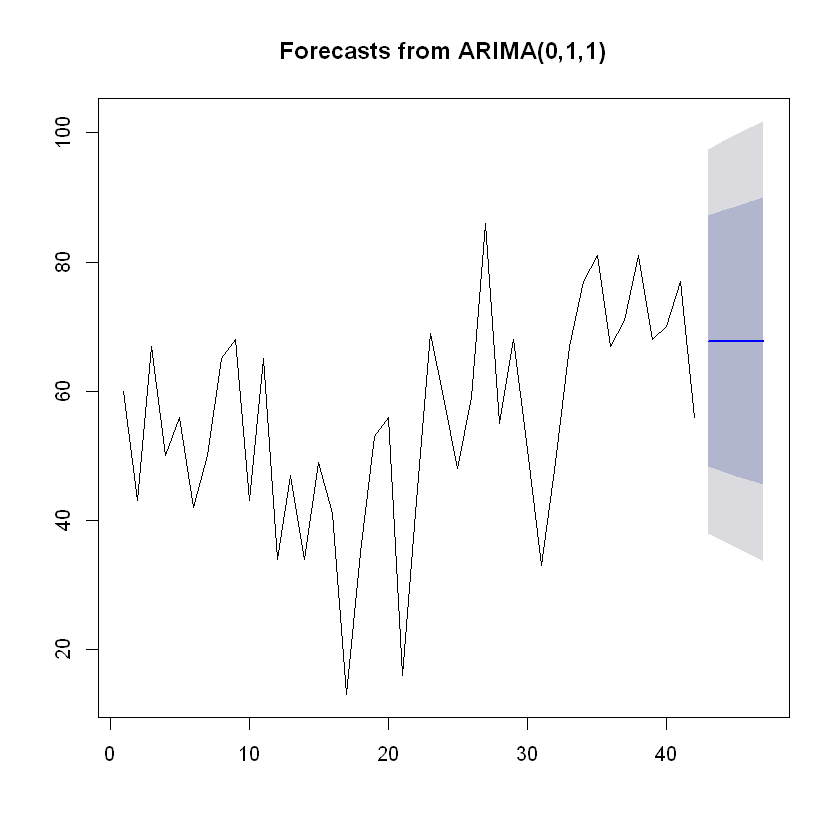

In [976]:
forecast:::plot.forecast(kingstimeseriesforecasts)

As in the case of exponential smoothing models, it is a good idea to investigate whether the forecast errors of an ARIMA model are normally distributed with mean zero and constant variance, and whether the are correlations between successive forecast errors.

For example, we can make a correlogram of the forecast errors for our ARIMA(0,1,1) model for the ages at death of kings, and perform the Ljung-Box test for lags 1-20, by typing:

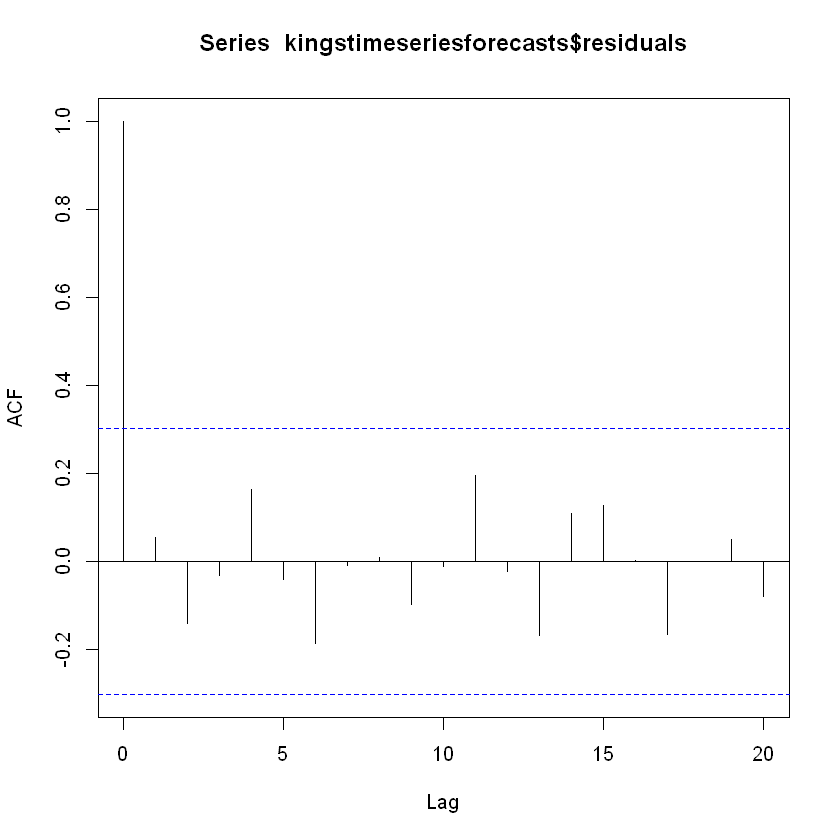

In [977]:
acf(kingstimeseriesforecasts$residuals, lag.max=20)

In [978]:
Box.test(kingstimeseriesforecasts$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  kingstimeseriesforecasts$residuals
X-squared = 13.584, df = 20, p-value = 0.8509


Since the correlogram shows that none of the sample autocorrelations for lags 1-20 exceed the significance bounds, and the p-value for the Ljung-Box test is 0.9, we can conclude that there is very little evidence for non-zero autocorrelations in the forecast errors at lags 1-20.

To investigate whether the forecast errors are normally distributed with mean zero and constant variance, we can make a time plot and histogram (with overlaid normal curve) of the forecast errors:

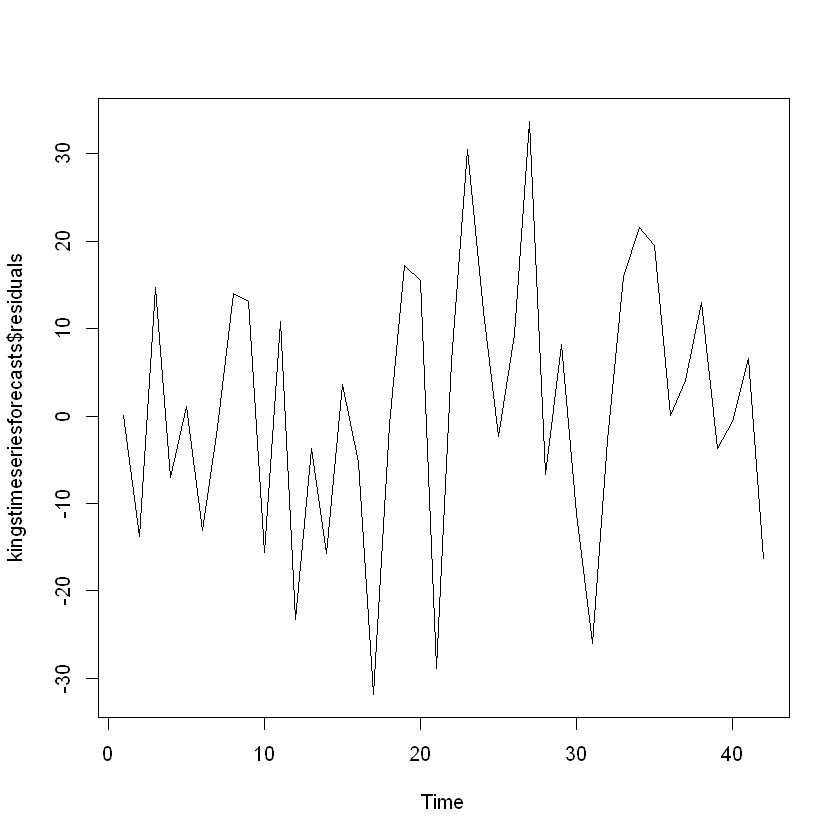

In [979]:
plot.ts(kingstimeseriesforecasts$residuals)            # make time plot of forecast errors

In [980]:
residuals <-  as.factor(kingstimeseriesforecasts$residuals)
residuals <- as.numeric(as.character(residuals[!is.na(residuals)]))
residuals[1:10]

[1]   0.05999995 -13.78450896  14.67697042  -6.97182689   1.13402867
 [6] -13.07231894  -1.33971064  14.00248889  13.06406866 -15.57254759

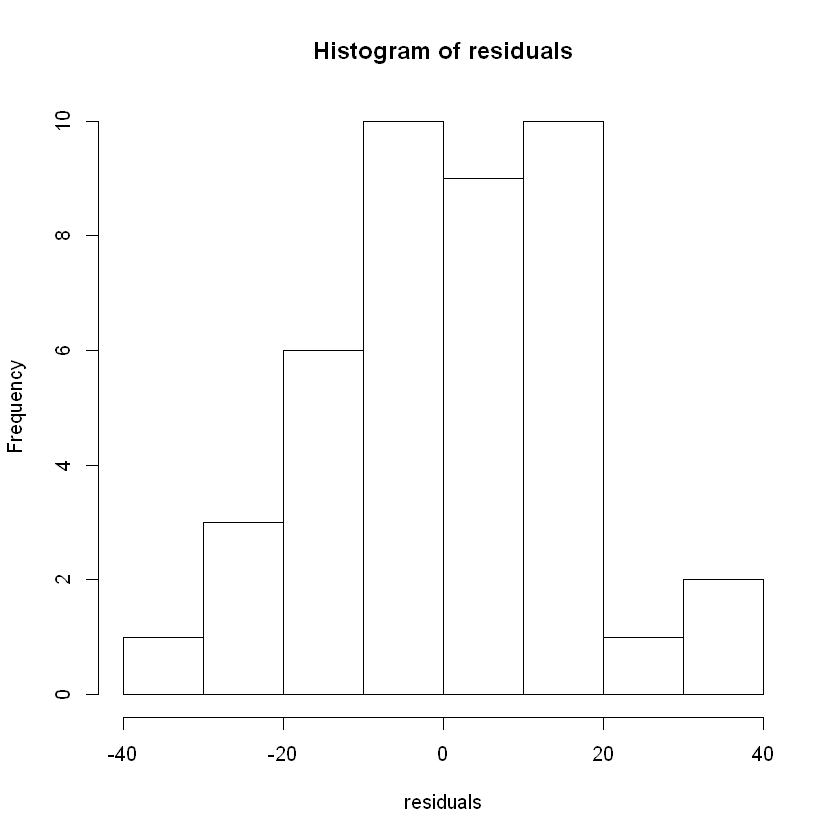

In [981]:
hist(residuals)

In [982]:
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.98622, p-value = 0.8856


In [983]:
mean(residuals)

[1] 0.9712931

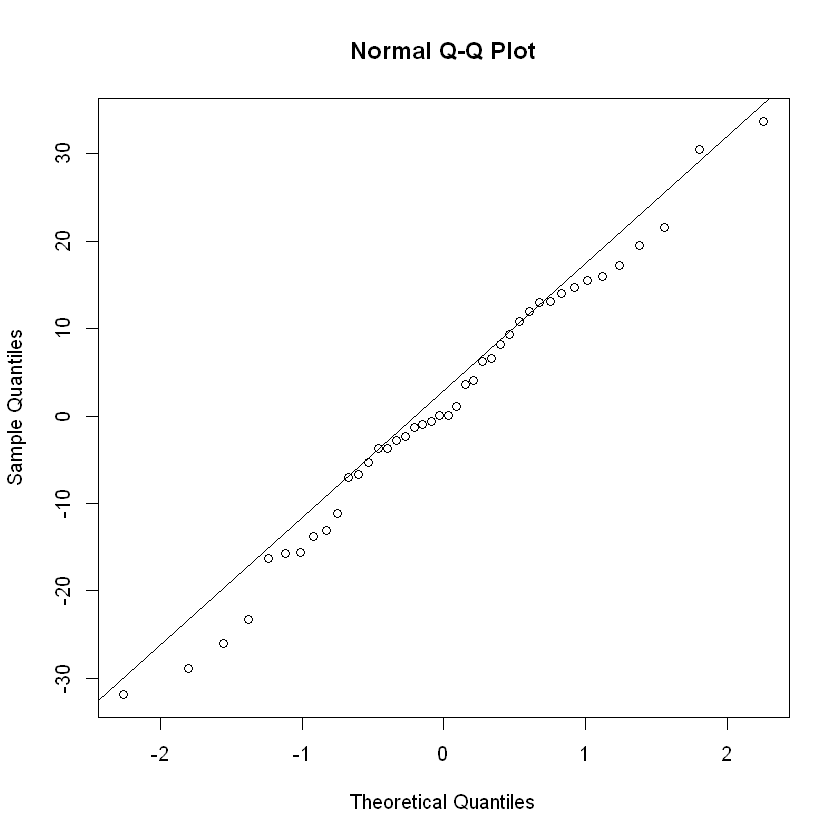

In [984]:
qqnorm(residuals); qqline(residuals)

The time plot of the in-sample forecast errors shows that the variance of the forecast errors seems to be roughly constant over time (though perhaps there is slightly higher variance for the second half of the time series). The histogram of the time series shows that the forecast errors are roughly normally distributed and the mean seems to be close to zero. Therefore, it is plausible that the forecast errors are normally distributed with mean zero and constant variance.

Since successive forecast errors do not seem to be correlated, and the forecast errors seem to be normally distributed with mean zero and constant variance, the ARIMA(0,1,1) does seem to provide an adequate predictive model for the ages at death of English kings.

#### Example of the Volcanic Dust Veil in the Northern Hemisphere
We discussed above that an appropriate ARIMA model for the time series of volcanic dust veil index may be an ARIMA(2,0,0) model. To fit an ARIMA(2,0,0) model to this time series, we can type:

In [985]:
volcanodustseriesarima <- arima(volcanodustseries, order=c(2,0,0))

volcanodustseriesarima


Call:
arima(x = volcanodustseries, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.7533  -0.1268    57.5274
s.e.  0.0457   0.0458     8.5958

sigma^2 estimated as 4870:  log likelihood = -2662.54,  aic = 5333.09

As mentioned above, an ARIMA(2,0,0) model can be written as: written as: X_t - mu = (Beta1 * (X_t-1 - mu)) + (Beta2 * (Xt-2 - mu)) + Z_t, where Beta1 and Beta2 are parameters to be estimated. The output of the arima() function tells us that Beta1 and Beta2 are estimated as 0.7533 and -0.1268 here (given as ar1 and ar2 in the output of arima()).

Now we have fitted the ARIMA(2,0,0) model, we can use the “forecast.ARIMA()” model to predict future values of the volcanic dust veil index. The original data includes the years 1500-1969. To make predictions for the years 1970-2000 (31 more years), we type:

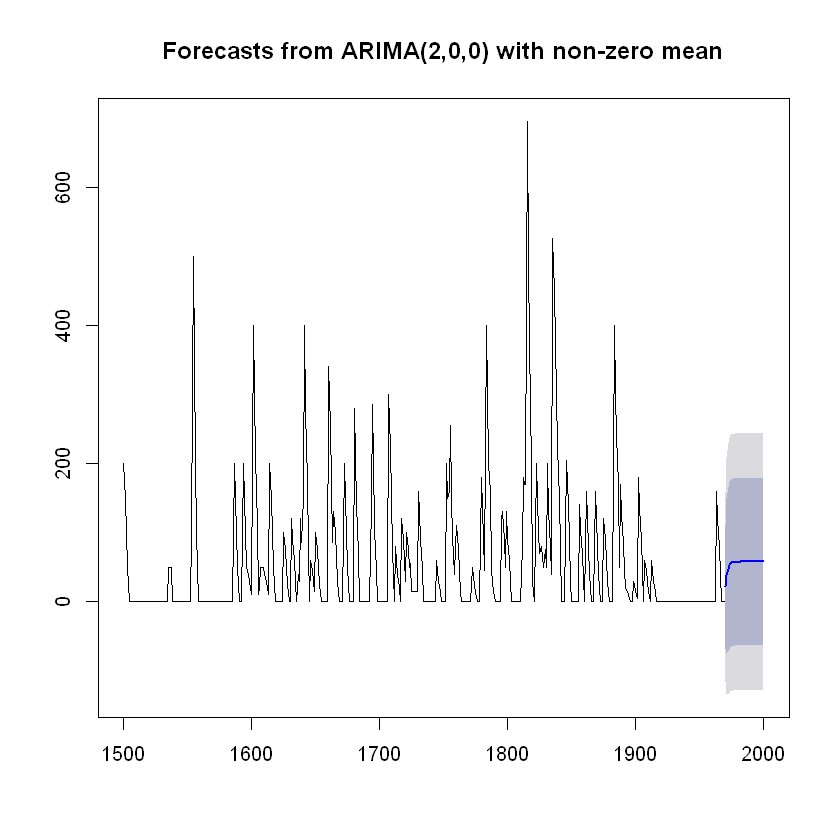

In [986]:
volcanodustseriesforecasts <- forecast:::forecast.Arima(volcanodustseriesarima, h=31)

forecast:::plot.forecast(volcanodustseriesforecasts)

One worrying thing is that the model has predicted negative values for the volcanic dust veil index, but this variable can only have positive values! The reason is that the arima() and forecast.Arima() functions don’t know that the variable can only take positive values. Clearly, this is not a very desirable feature of our current predictive model.

Again, we should investigate whether the forecast errors seem to be correlated, and whether they are normally distributed with mean zero and constant variance. To check for correlations between successive forecast errors, we can make a correlogram and use the Ljung-Box test:

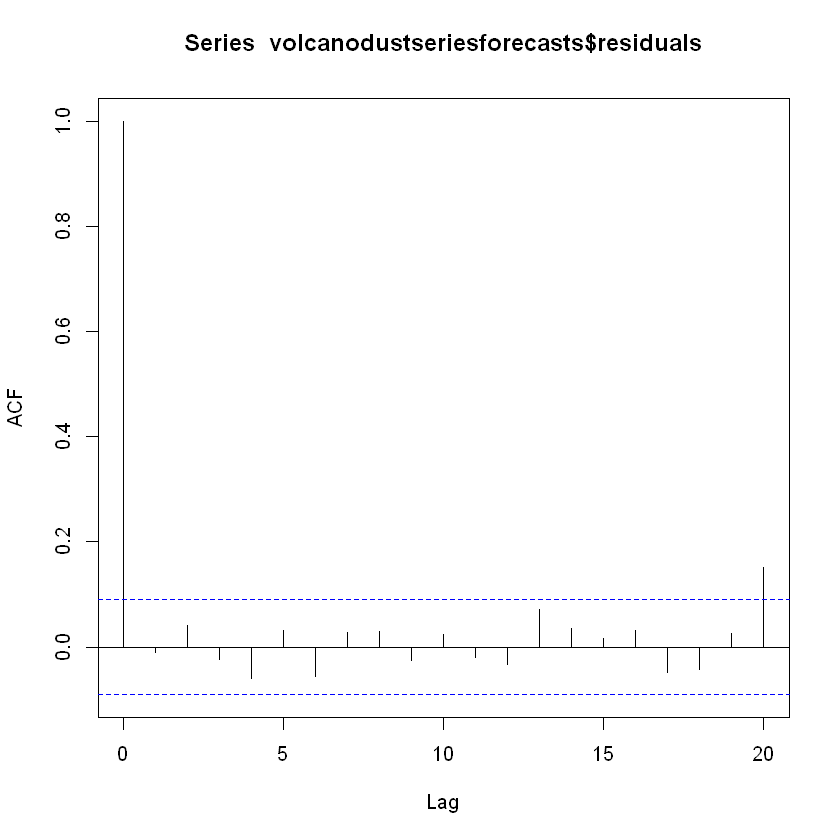

In [987]:
acf(volcanodustseriesforecasts$residuals, lag.max=20)

In [988]:
Box.test(volcanodustseriesforecasts$residuals, lag=20, type="Ljung-Box")


	Box-Ljung test

data:  volcanodustseriesforecasts$residuals
X-squared = 24.364, df = 20, p-value = 0.2268


The correlogram shows that the sample autocorrelation at lag 20 exceeds the significance bounds. However, this is probably due to chance, since we would expect one out of 20 sample autocorrelations to exceed the 95% significance bounds. Furthermore, the p-value for the Ljung-Box test is 0.2, indicating that there is little evidence for non-zero autocorrelations in the forecast errors for lags 1-20.

To check whether the forecast errors are normally distributed with mean zero and constant variance, we make a time plot of the forecast errors, and a histogram:

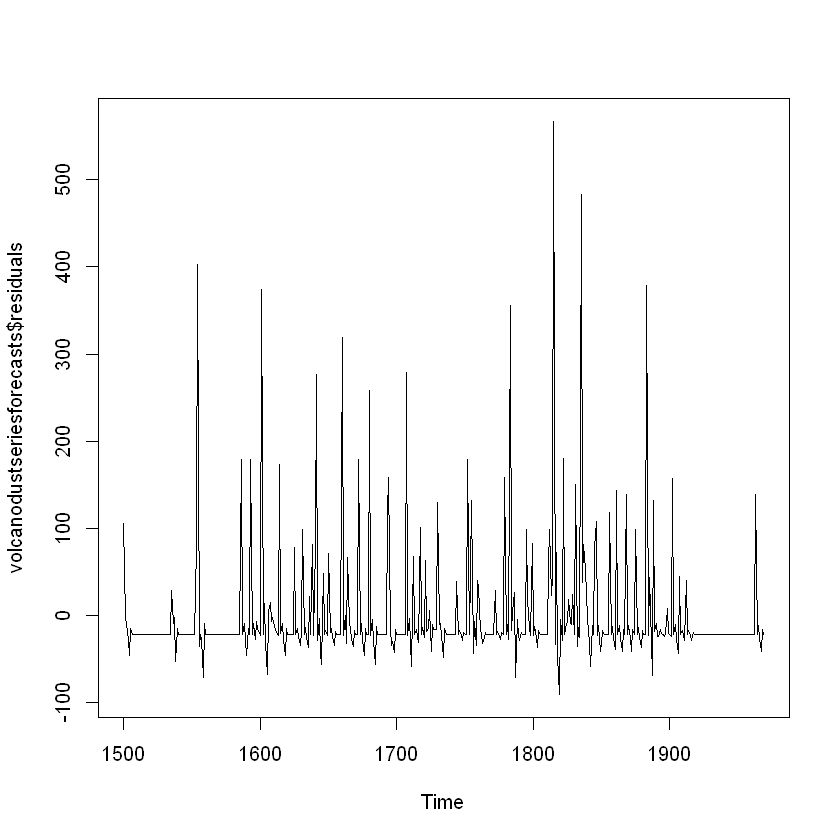

In [989]:
plot.ts(volcanodustseriesforecasts$residuals)            # make time plot of forecast errors

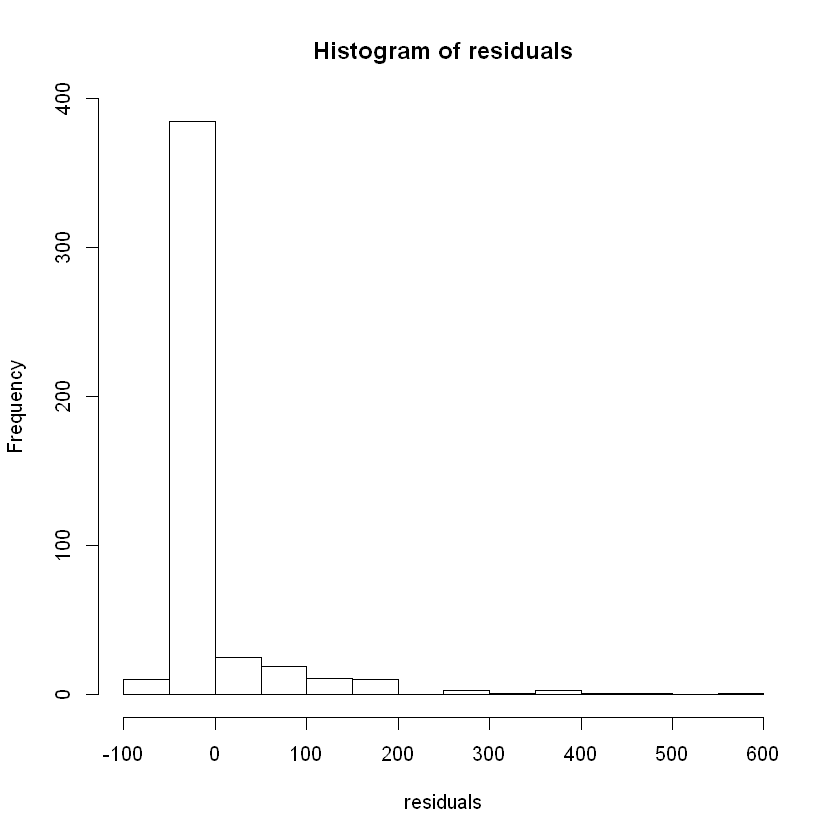

In [990]:
residuals <-  as.factor(volcanodustseriesforecasts$residuals)
residuals <- as.numeric(as.character(residuals[!is.na(residuals)]))

hist(residuals)

In [991]:
shapiro.test(residuals)


	Shapiro-Wilk normality test

data:  residuals
W = 0.476, p-value < 2.2e-16


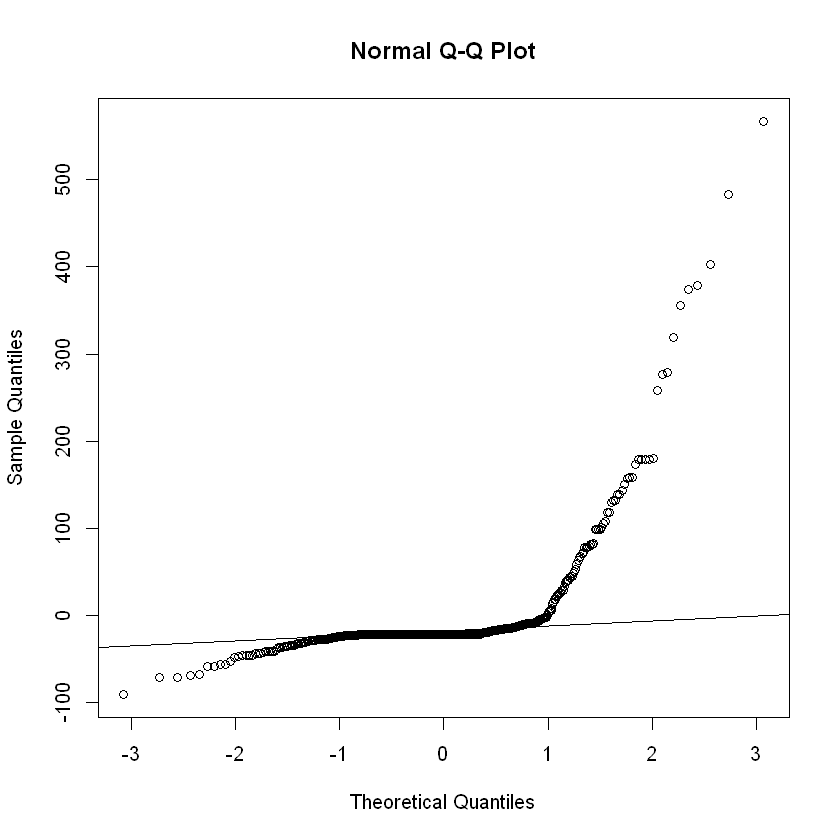

In [992]:
qqnorm(residuals); qqline(residuals)

The time plot of forecast errors shows that the forecast errors seem to have roughly constant variance over time. However, the time series of forecast errors seems to have a negative mean, rather than a zero mean. We can confirm this by calculating the mean forecast error, which turns out to be about -0.22:

In [993]:
mean(volcanodustseriesforecasts$residuals)

[1] -0.2205417

The histogram of forecast errors (above) shows that although the mean value of the forecast errors is negative, the distribution of forecast errors is skewed to the right compared to a normal curve. Therefore, it seems that we cannot comfortably conclude that the forecast errors are normally distributed with mean zero and constant variance! Thus, it is likely that our ARIMA(2,0,0) model for the time series of volcanic dust veil index is not the best model that we could make, and could almost definitely be improved upon!